# Housing Price analysis

## Importing the Libraries and Setting Few Values

In [1]:
import pandas as pd
import numpy as np
import pyodbc
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as stats
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings("ignore")

## Reading the csv file

In [3]:
df = pd.read_csv('housing.csv')
df.head()

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished

In [4]:
df.head()

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished

In [5]:
df.tail()

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
540  1820000  3000         2          1        1      yes        no      yes   
541  1767150  2400         3          1        1       no        no       no   
542  1750000  3620         2          1        1      yes        no       no   
543  1750000  2910         3          1        1       no        no       no   
544  1750000  3850         3          1        2      yes        no       no   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  
540              no              no        2       no      unfurnished  
541              no              no        0       no   semi-furnished  
542              no              no        0       no      unfurnished  
543              no              no        0       no        furnished  
544              no              no        0       no      unfurnished

In [6]:
df.shape

(545, 13)

### Checking the datatypes

In [7]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

### Showing the statistical Information

In [8]:
df.describe()

price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000

In [9]:
df.describe(include = 'all')

price          area    bedrooms   bathrooms     stories  \
count   5.450000e+02    545.000000  545.000000  545.000000  545.000000   
unique           NaN           NaN         NaN         NaN         NaN   
top              NaN           NaN         NaN         NaN         NaN   
freq             NaN           NaN         NaN         NaN         NaN   
mean    4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std     1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min     1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%     3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%     4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%     5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max     1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

       mainroad guestroom basement hotwaterheating airconditioning  \
count       545       545      545             545             545   
unique        2         2        2               2               2   
top         yes        no       no              no              no   
freq        468       448      354             520             373   
mean        NaN       NaN      NaN             NaN             NaN   
std         NaN       NaN      NaN             NaN             NaN   
min         NaN       NaN      NaN             NaN             NaN   
25%         NaN       NaN      NaN             NaN             NaN   
50%         NaN       NaN      NaN             NaN             NaN   
75%         NaN       NaN      NaN             NaN             NaN   
max         NaN       NaN      NaN             NaN             NaN   

           parking prefarea furnishingstatus  
count   545.000000      545              545  
unique         NaN        2                3  
top            NaN       no   semi-furnished  
freq           NaN      417              227  
mean      0.693578      NaN              NaN  
std       0.861586      NaN              NaN  
min       0.000000      NaN              NaN  
25%       0.000000      NaN              NaN  
50%       0.000000      NaN              NaN  
75%       1.000000      NaN              NaN  
max       3.000000      NaN              NaN

### Getting the summary of the dataframe

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [11]:
df.shape

(545, 13)

## Data Wrangling

In [12]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

### Checking for null values

In [13]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

### Identify the missing values

In [14]:
df.replace('?', np.nan, inplace = True)
df.head()

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished

In [15]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

##### Since, there is no missing values in our dataset and our data look to be in a correct format, we can directly jump to data normalization for further analysis.

## Data Normalisation

### Using z-score normalisaiton for all the numerical columns

In [16]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [17]:
df2 = df.copy()

In [18]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [19]:
columns = ['area', 'bedrooms', 'bathrooms', 'stories','parking']

In [20]:
for i in columns:
    df[i] = (df[i] - df[i].mean())/df[i].std()
    
print("z-score normalization has been applied to all the numerical columns")

z-score normalization has been applied to all the numerical columns


In [21]:
df.head()

price      area  bedrooms  bathrooms   stories mainroad guestroom  \
0  13300000  1.045766  1.402131   1.420507  1.376952      yes        no   
1  12250000  1.755397  1.402131   5.400847  2.529700      yes        no   
2  12250000  2.216196  0.047235   1.420507  0.224204      yes        no   
3  12215000  1.082630  1.402131   1.420507  0.224204      yes        no   
4  11410000  1.045766  1.402131  -0.569663  0.224204      yes       yes   

  basement hotwaterheating airconditioning   parking prefarea furnishingstatus  
0       no              no             yes  1.516299      yes        furnished  
1       no              no             yes  2.676950       no        furnished  
2      yes              no              no  1.516299      yes   semi-furnished  
3      yes              no             yes  2.676950      yes        furnished  
4      yes              no             yes  1.516299       no        furnished

## Data Binning

In [22]:
df_normalized = df.copy()

In [23]:
df['price'].dtype

dtype('int64')

In [24]:
bins = np.linspace(df['price'].min(), df['price'].max(), 4)
bins

array([ 1750000.,  5600000.,  9450000., 13300000.])

In [25]:
group_names = ["Low", "Medium", "High"]

In [26]:
df["price-binned"] = pd.cut(df['price'], bins, labels = group_names, include_lowest=True)
df.tail()

price      area  bedrooms  bathrooms   stories mainroad guestroom  \
540  1820000 -0.990968 -1.307661  -0.569663 -0.928544      yes        no   
541  1767150 -1.267448  0.047235  -0.569663 -0.928544       no        no   
542  1750000 -0.705273 -1.307661  -0.569663 -0.928544      yes        no   
543  1750000 -1.032440  0.047235  -0.569663 -0.928544       no        no   
544  1750000 -0.599289  0.047235  -0.569663  0.224204      yes        no   

    basement hotwaterheating airconditioning   parking prefarea  \
540      yes              no              no  1.516299       no   
541       no              no              no -0.805002       no   
542       no              no              no -0.805002       no   
543       no              no              no -0.805002       no   
544       no              no              no -0.805002       no   

    furnishingstatus price-binned  
540      unfurnished          Low  
541   semi-furnished          Low  
542      unfurnished          Low  
543        furnished          Low  
544      unfurnished          Low

In [27]:
df['price-binned'].value_counts()

price-binned
Low       403
Medium    130
High       12
Name: count, dtype: int64

### Plotting the distribution of each bin

Text(0.5, 1.0, 'price bins')

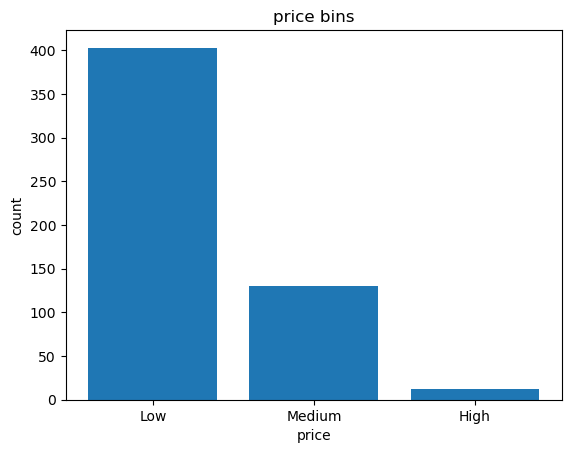

In [28]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["price-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("price")
plt.pyplot.ylabel("count")
plt.pyplot.title("price bins")

### Bins Visualization

Text(0.5, 1.0, 'price bins')

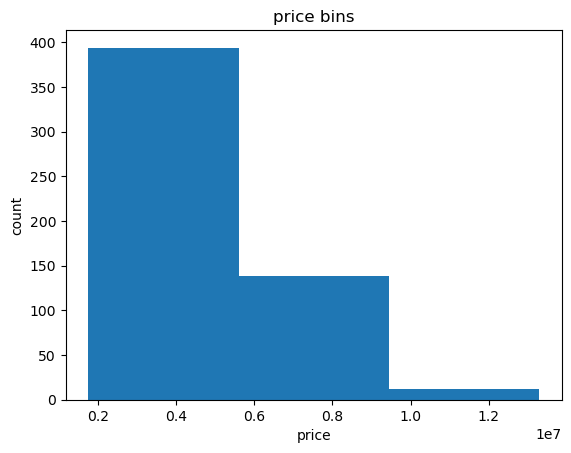

In [29]:
# draw historgram of attribute "price" with bins = 3
plt.pyplot.hist(df["price"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("price")
plt.pyplot.ylabel("count")
plt.pyplot.title("price bins")

Text(0.5, 0, 'Price Bins')

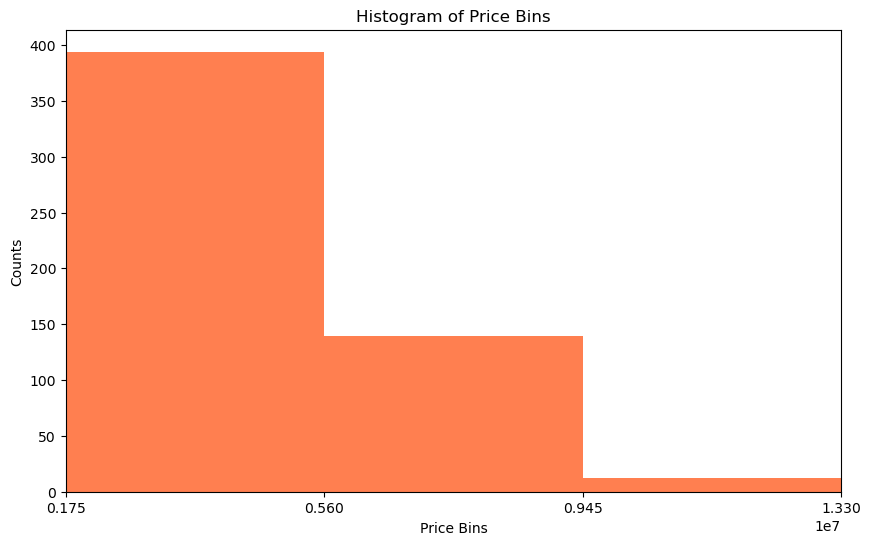

In [30]:
%matplotlib inline
df_price_hist = df['price']
count, bin_edges = np.histogram(df_price_hist, 3)
xmin = bin_edges[0] - 10    
xmax = bin_edges[-1] + 10

# stacked Histogram
df_price_hist.plot(kind='hist',
          figsize=(10, 6),
          bins=3,
          xticks=bin_edges,
          color=['coral'],
          xlim=(xmin, xmax)
         )

plt.pyplot.title('Histogram of Price Bins')
plt.pyplot.ylabel('Counts')
plt.pyplot.xlabel('Price Bins') 

## Turning Categorical variable into Quantitative variable

### Dummy Variable

In [31]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus', 'price-binned'],
      dtype='object')

In [32]:
df.head()

price      area  bedrooms  bathrooms   stories mainroad guestroom  \
0  13300000  1.045766  1.402131   1.420507  1.376952      yes        no   
1  12250000  1.755397  1.402131   5.400847  2.529700      yes        no   
2  12250000  2.216196  0.047235   1.420507  0.224204      yes        no   
3  12215000  1.082630  1.402131   1.420507  0.224204      yes        no   
4  11410000  1.045766  1.402131  -0.569663  0.224204      yes       yes   

  basement hotwaterheating airconditioning   parking prefarea  \
0       no              no             yes  1.516299      yes   
1       no              no             yes  2.676950       no   
2      yes              no              no  1.516299      yes   
3      yes              no             yes  2.676950      yes   
4      yes              no             yes  1.516299       no   

  furnishingstatus price-binned  
0        furnished         High  
1        furnished         High  
2   semi-furnished         High  
3        furnished         High  
4        furnished         High

In [33]:
dummy_variable1 = pd.get_dummies(df['furnishingstatus'])
dummy_variable1.tail()

furnished  semi-furnished  unfurnished
540      False           False         True
541      False            True        False
542      False           False         True
543       True           False        False
544      False           False         True

In [34]:
df = pd.concat([df, dummy_variable1], axis = 1)
df.drop("furnishingstatus", axis=1, inplace = True)
df.head()

price      area  bedrooms  bathrooms   stories mainroad guestroom  \
0  13300000  1.045766  1.402131   1.420507  1.376952      yes        no   
1  12250000  1.755397  1.402131   5.400847  2.529700      yes        no   
2  12250000  2.216196  0.047235   1.420507  0.224204      yes        no   
3  12215000  1.082630  1.402131   1.420507  0.224204      yes        no   
4  11410000  1.045766  1.402131  -0.569663  0.224204      yes       yes   

  basement hotwaterheating airconditioning   parking prefarea price-binned  \
0       no              no             yes  1.516299      yes         High   
1       no              no             yes  2.676950       no         High   
2      yes              no              no  1.516299      yes         High   
3      yes              no             yes  2.676950      yes         High   
4      yes              no             yes  1.516299       no         High   

   furnished  semi-furnished  unfurnished  
0       True           False        False  
1       True           False        False  
2      False            True        False  
3       True           False        False  
4       True           False        False

In [35]:
df_cleaned = df.copy()

## Exploratory Data Analysis

In [36]:
## Note: Dropping the unnecessary columns after the analysis

In [37]:
df.describe()

price          area      bedrooms     bathrooms       stories  \
count  5.450000e+02  5.450000e+02  5.450000e+02  5.450000e+02  5.450000e+02   
mean   4.766729e+06 -1.564498e-16 -2.607496e-16  2.607496e-17 -1.042999e-16   
std    1.870440e+06  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min    1.750000e+06 -1.613048e+00 -2.662558e+00 -5.696634e-01 -9.285436e-01   
25%    3.430000e+06 -7.144887e-01 -1.307661e+00 -5.696634e-01 -9.285436e-01   
50%    4.340000e+06 -2.536892e-01  4.723492e-02 -5.696634e-01  2.242042e-01   
75%    5.740000e+06  5.573180e-01  4.723492e-02  1.420507e+00  2.242042e-01   
max    1.330000e+07  5.091586e+00  4.111924e+00  5.400847e+00  2.529700e+00   

            parking  
count  5.450000e+02  
mean  -5.214993e-17  
std    1.000000e+00  
min   -8.050017e-01  
25%   -8.050017e-01  
50%   -8.050017e-01  
75%    3.556489e-01  
max    2.676950e+00

In [38]:
df.describe(include='all')

price          area      bedrooms     bathrooms       stories  \
count   5.450000e+02  5.450000e+02  5.450000e+02  5.450000e+02  5.450000e+02   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    4.766729e+06 -1.564498e-16 -2.607496e-16  2.607496e-17 -1.042999e-16   
std     1.870440e+06  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min     1.750000e+06 -1.613048e+00 -2.662558e+00 -5.696634e-01 -9.285436e-01   
25%     3.430000e+06 -7.144887e-01 -1.307661e+00 -5.696634e-01 -9.285436e-01   
50%     4.340000e+06 -2.536892e-01  4.723492e-02 -5.696634e-01  2.242042e-01   
75%     5.740000e+06  5.573180e-01  4.723492e-02  1.420507e+00  2.242042e-01   
max     1.330000e+07  5.091586e+00  4.111924e+00  5.400847e+00  2.529700e+00   

       mainroad guestroom basement hotwaterheating airconditioning  \
count       545       545      545             545             545   
unique        2         2        2               2               2   
top         yes        no       no              no              no   
freq        468       448      354             520             373   
mean        NaN       NaN      NaN             NaN             NaN   
std         NaN       NaN      NaN             NaN             NaN   
min         NaN       NaN      NaN             NaN             NaN   
25%         NaN       NaN      NaN             NaN             NaN   
50%         NaN       NaN      NaN             NaN             NaN   
75%         NaN       NaN      NaN             NaN             NaN   
max         NaN       NaN      NaN             NaN             NaN   

             parking prefarea price-binned furnished semi-furnished  \
count   5.450000e+02      545          545       545            545   
unique           NaN        2            3         2              2   
top              NaN       no          Low     False          False   
freq             NaN      417          403       405            318   
mean   -5.214993e-17      NaN          NaN       NaN            NaN   
std     1.000000e+00      NaN          NaN       NaN            NaN   
min    -8.050017e-01      NaN          NaN       NaN            NaN   
25%    -8.050017e-01      NaN          NaN       NaN            NaN   
50%    -8.050017e-01      NaN          NaN       NaN            NaN   
75%     3.556489e-01      NaN          NaN       NaN            NaN   
max     2.676950e+00      NaN          NaN       NaN            NaN   

       unfurnished  
count          545  
unique           2  
top          False  
freq           367  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN

### Checking the Unique Values of each column

In [39]:
columns_to_check = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 
                    'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 
                    'parking', 'prefarea', 'price-binned', 'furnished', 
                    'semi-furnished', 'unfurnished']

for column in columns_to_check:
    unique_values = df[column].value_counts()
    print(f"Unique values for column '{column}':\n{unique_values}\n")


Unique values for column 'area':
area
 0.391430    24
-0.990968    14
-0.299769    13
-0.530169    11
 0.161030     9
 0.667910     9
-0.714489     8
-0.700665     7
-0.696057     7
 0.557318     7
-0.908025     7
-0.511737     7
-1.384952     6
-0.760569     6
 0.114950     6
-0.769785     5
-0.253689     5
-0.161529     5
-0.599289     5
-0.783609     5
-0.751353     5
 0.852230     5
-0.345849     4
 1.773829     4
-0.797433     4
-0.382713     4
-0.921849     4
 1.428229     4
 0.584966     4
-0.548601     3
-0.069369     3
 0.068871     3
 2.465028     3
-0.935673     3
 1.497349     3
-0.905721     3
 0.437510     3
-0.484089     3
 0.640262     3
-0.645369     3
-0.880377     3
-0.087801     3
 1.359109     3
 0.299270     3
 1.303813     2
 0.598790     2
-0.691449     2
-0.852729     2
 0.336134     2
 0.022791     2
 1.045766     2
-0.368889     2
-0.622329     2
 0.078086     2
 0.322310     2
-1.170680     2
-0.143097     2
-0.493305     2
-1.046264     2
-0.115449     2
 0

### Box Plot Analysis on the Data

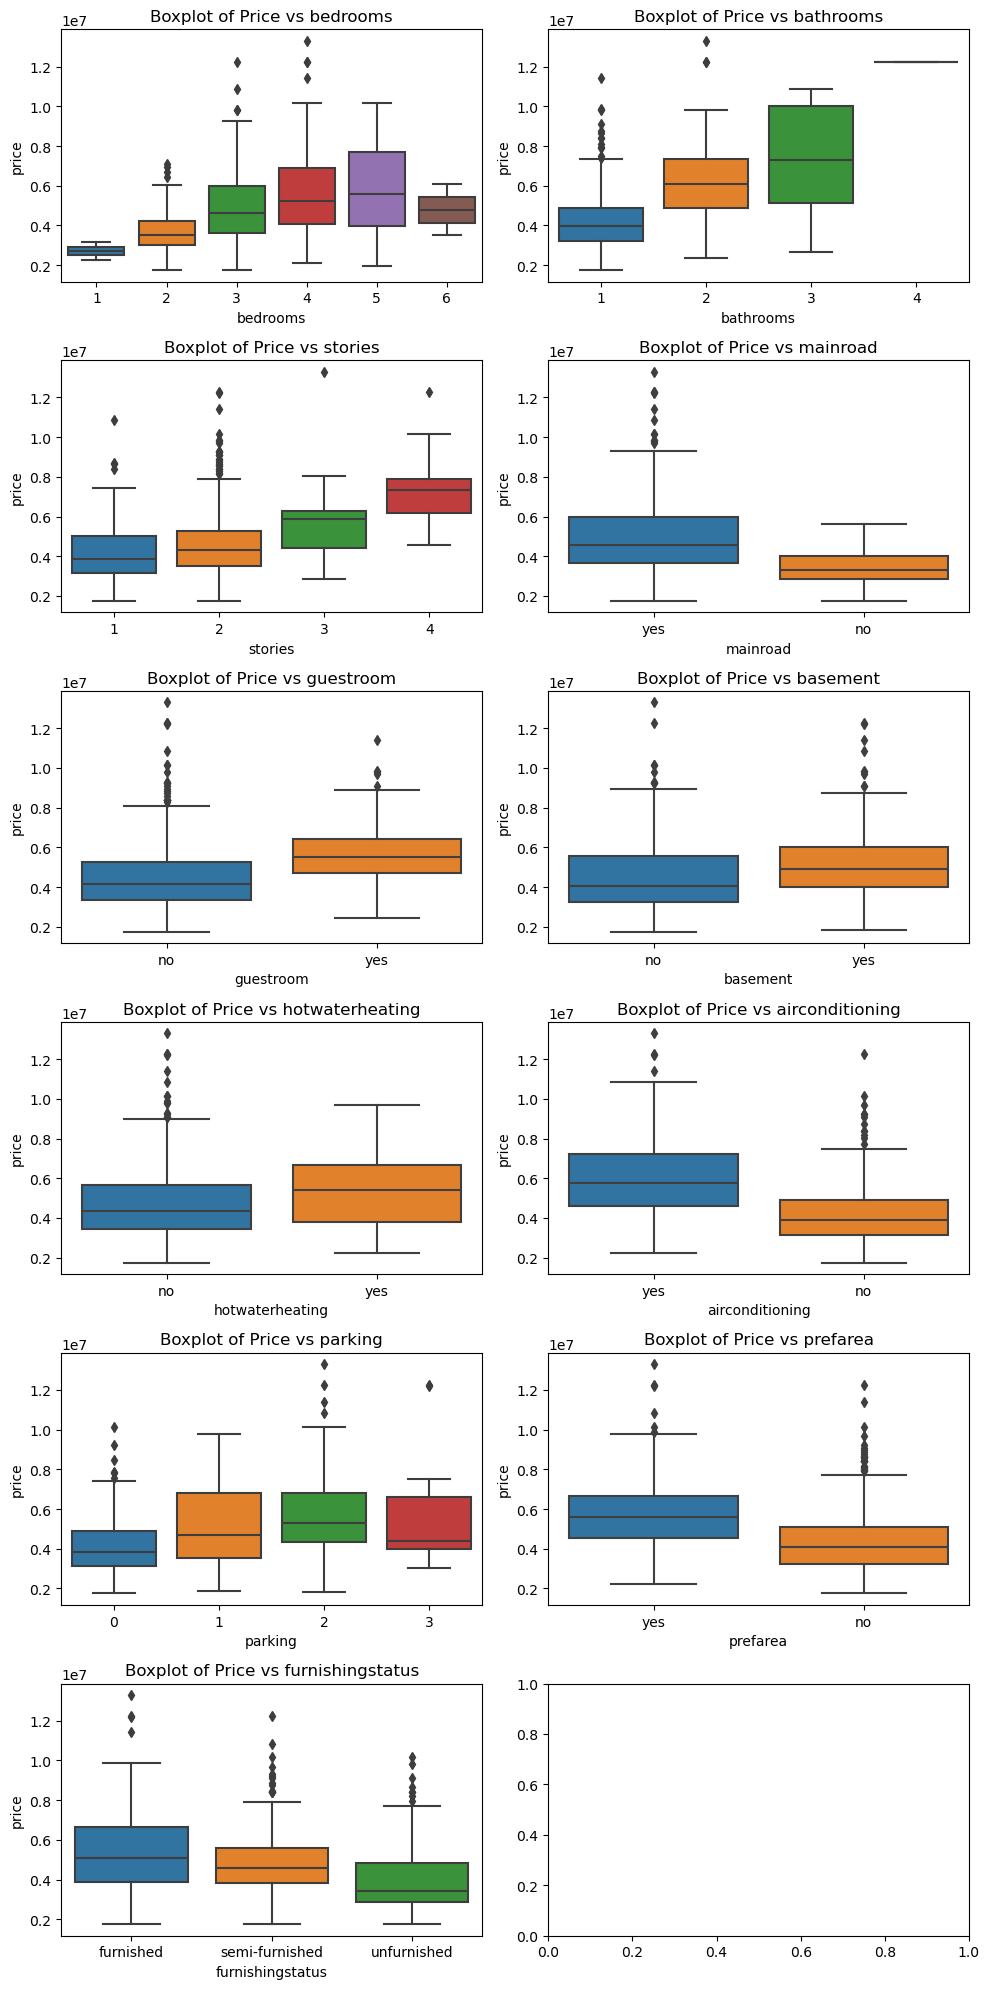

In [40]:
from matplotlib import pyplot as plt
# List of categorical variables
categorical_vars = ['bedrooms', 'bathrooms', 'stories', 'mainroad', 
                    'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 
                    'parking', 'prefarea', 'furnishingstatus']

# Create a figure with subplots
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(10, 20))

# Flatten axes for easier iteration
axes = axes.flatten()

# Iterate over categorical variables and create boxplots
for i, var in enumerate(categorical_vars):
    if i < len(axes):  # Check if index is within bounds
        sns.boxplot(x=var, y='price', data=df2, ax=axes[i])
        axes[i].set_title(f'Boxplot of Price vs {var}')

plt.tight_layout()
plt.show()


In [41]:
df3 = df2.copy()
df3.head()

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished

### Area Binning for Box plot analysis

In [42]:
df3['area'].dtype

dtype('int64')

In [43]:
df_area = pd.DataFrame(df3[['area', 'price']])
df_area.head()

area     price
0  7420  13300000
1  8960  12250000
2  9960  12250000
3  7500  12215000
4  7420  11410000

In [44]:
df_area['area'].value_counts()

area
6000     24
3000     14
4500     13
4000     11
5500      9
6600      9
3600      8
3630      7
3640      7
6360      7
3180      7
4040      7
2145      6
3500      6
5400      6
3480      5
4600      5
4800      5
3850      5
3450      5
3520      5
7000      5
4400      4
9000      4
3420      4
4320      4
3150      4
8250      4
6420      4
3960      3
5000      3
5300      3
10500     3
3120      3
8400      3
3185      3
6100      3
4100      3
6540      3
3750      3
3240      3
4960      3
8100      3
5800      3
7980      2
6450      2
3650      2
3300      2
5880      2
5200      2
7420      2
4350      2
3800      2
5320      2
5850      2
2610      2
4840      2
4080      2
2880      2
4900      2
6060      2
3510      2
5900      2
4410      2
4510      2
3460      2
4050      2
4160      2
6900      2
4120      2
4095      2
2800      2
2700      2
1950      2
2787      2
7800      2
6750      2
3090      2
2400      2
3760      2
8050      2
3970      2
4260      2

In [45]:
print(np.min(df_area['area']), np.max(df_area['area']))

1650 16200


In [46]:
bins = [0, 3000, 6000, 9000, 12000, 15000, 18000]

In [47]:
bins

[0, 3000, 6000, 9000, 12000, 15000, 18000]

In [48]:
group_names1 = ["0-3000", "3000-6000", "6000-9000", "9000-12000", "12000-15000", "15000-18000"]

In [49]:
df_area["area-binned"] = pd.cut(df_area['area'],bins,labels=group_names1, include_lowest=True)

In [50]:
df_area.head(20)

area     price  area-binned
0    7420  13300000    6000-9000
1    8960  12250000    6000-9000
2    9960  12250000   9000-12000
3    7500  12215000    6000-9000
4    7420  11410000    6000-9000
5    7500  10850000    6000-9000
6    8580  10150000    6000-9000
7   16200  10150000  15000-18000
8    8100   9870000    6000-9000
9    5750   9800000    3000-6000
10  13200   9800000  12000-15000
11   6000   9681000    3000-6000
12   6550   9310000    6000-9000
13   3500   9240000    3000-6000
14   7800   9240000    6000-9000
15   6000   9100000    3000-6000
16   6600   9100000    6000-9000
17   8500   8960000    6000-9000
18   4600   8890000    3000-6000
19   6420   8855000    6000-9000

In [51]:
df_area['area-binned'].value_counts()

area-binned
3000-6000      322
6000-9000      132
0-3000          66
9000-12000      18
12000-15000      5
15000-18000      2
Name: count, dtype: int64

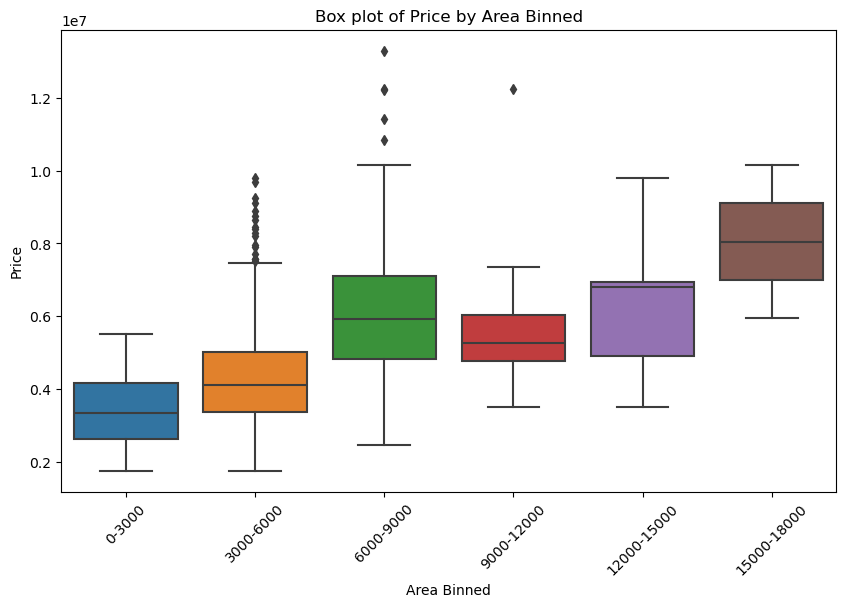

In [52]:
# Create box plot using seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='area-binned', y='price', data=df_area)
plt.title('Box plot of Price by Area Binned')
plt.xlabel('Area Binned')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


The bigger the house, the more money you have to pay, right? Well, not always. Sometimes you can find a huge bargain for a mansion-sized home, while other times you might end up paying a fortune for a tiny shack. It's like playing the lottery, but with real estate. Just look at the box plot: there are some outliers between 3000 and 12000 square feet that don't follow the trend at all. Maybe they have secret basements or haunted attics that affect the price. Who knows?

## Scatter Plot Analysis

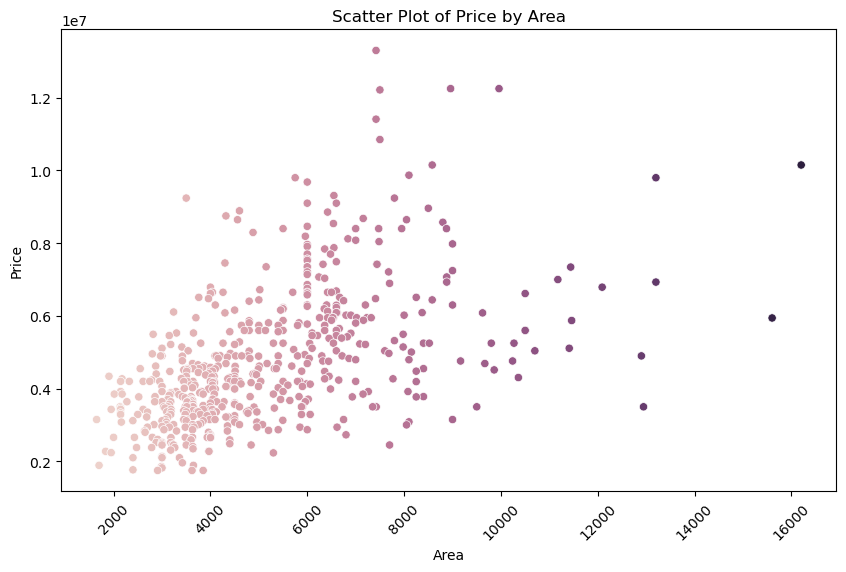

In [53]:
# Create scatter plot using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area', y='price', data=df_area, hue='area', legend=False)
plt.title('Scatter Plot of Price by Area')
plt.xlabel('Area')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

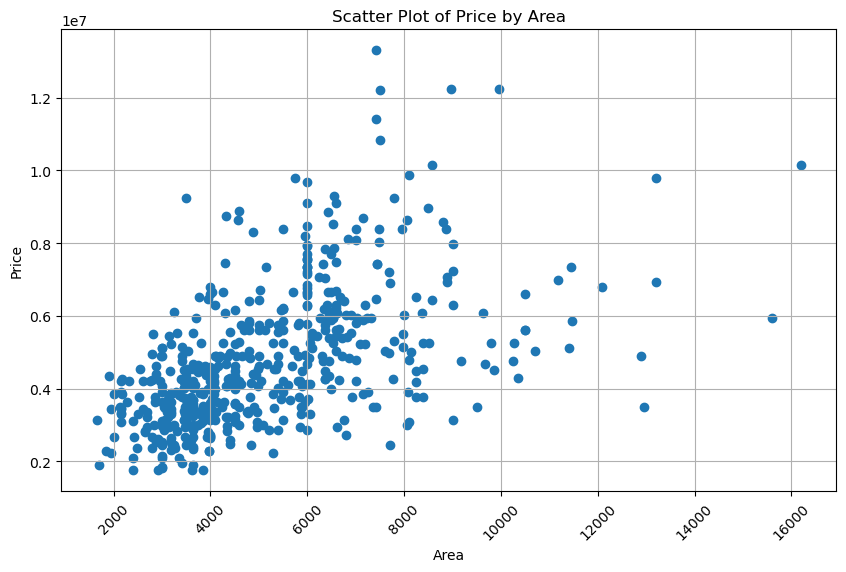

In [54]:
# Extract x and y data
x = df_area['area']
y = df_area['price']

# Create scatter plot using plt
plt.figure(figsize=(10, 6))
plt.scatter(x, y)
plt.title('Scatter Plot of Price by Area')
plt.xlabel('Area')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

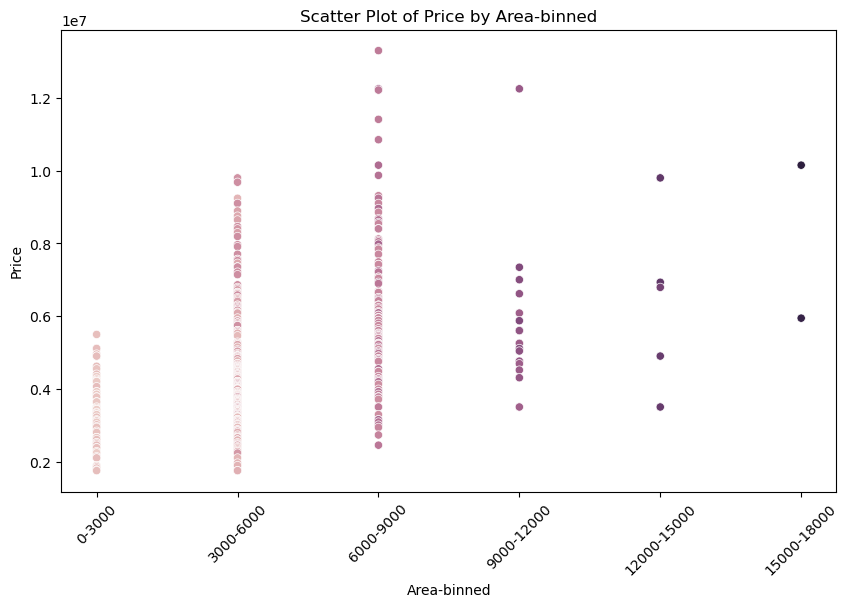

In [55]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='area-binned', y='price', data=df_area, hue='area', legend=False)
plt.title('Scatter Plot of Price by Area-binned')
plt.xlabel('Area-binned')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

In [56]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'price-binned', 'furnished', 'semi-furnished',
       'unfurnished'],
      dtype='object')

In [57]:
columns21 = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnished', 'semi-furnished',
       'unfurnished']

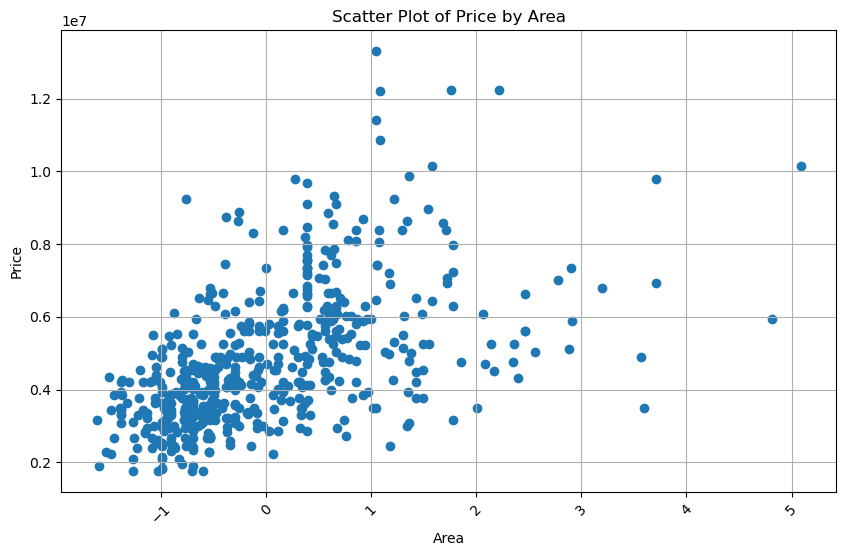

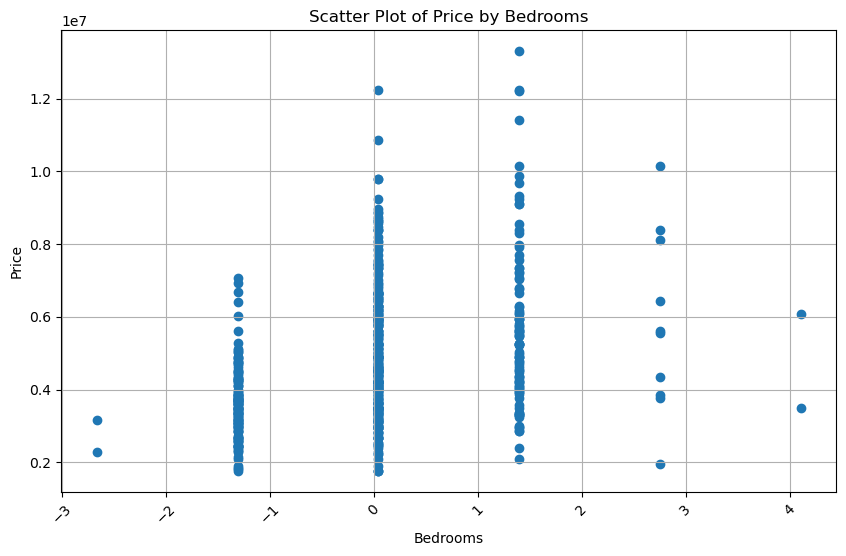

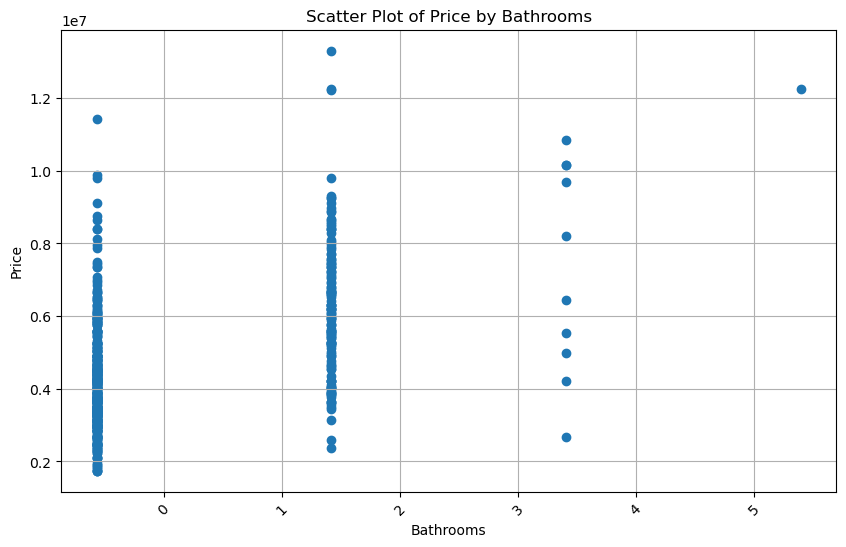

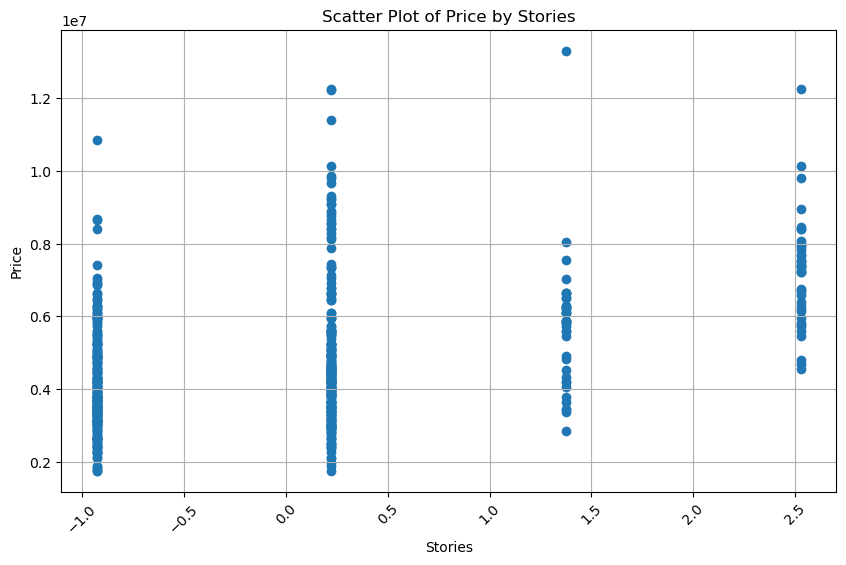

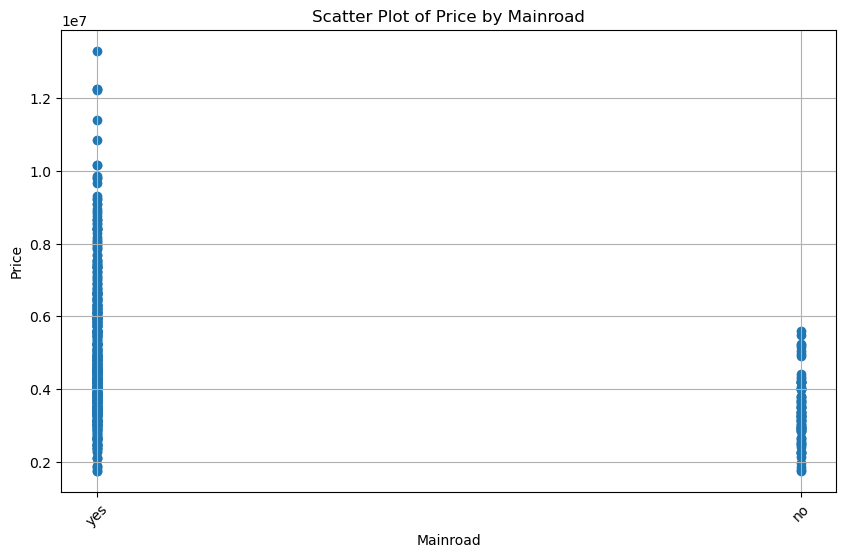

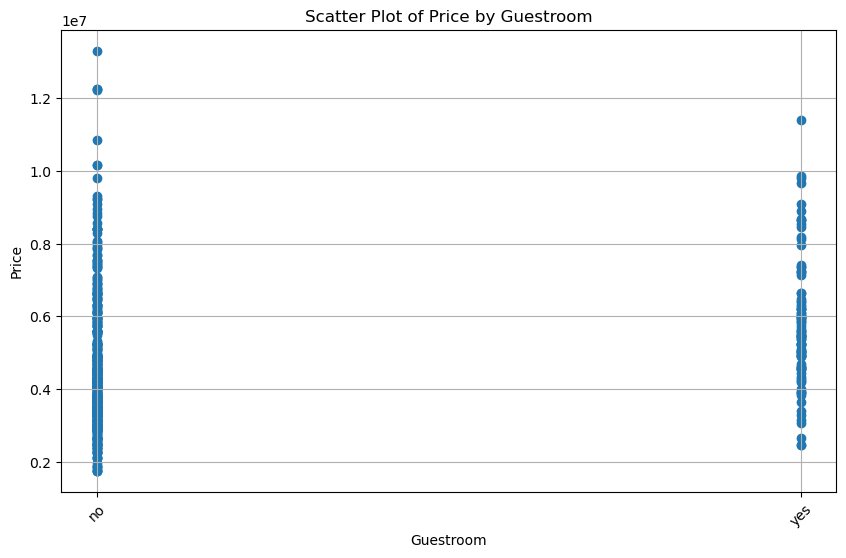

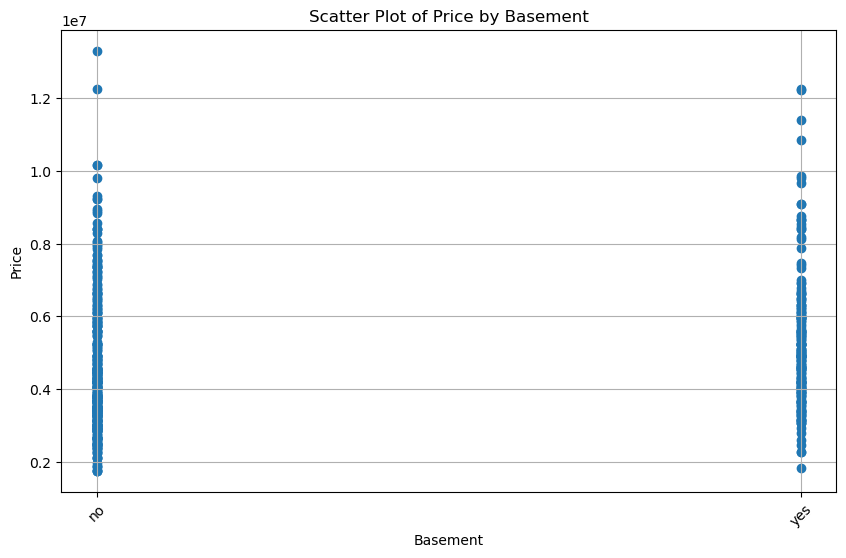

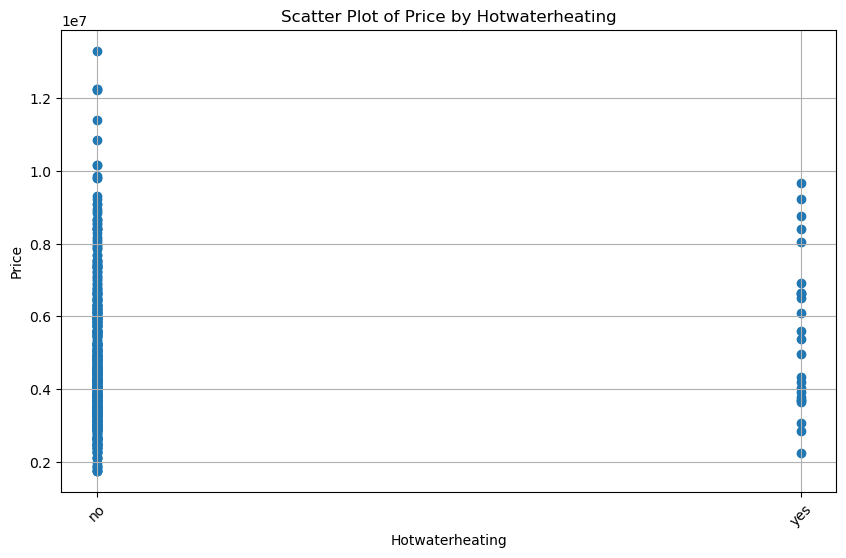

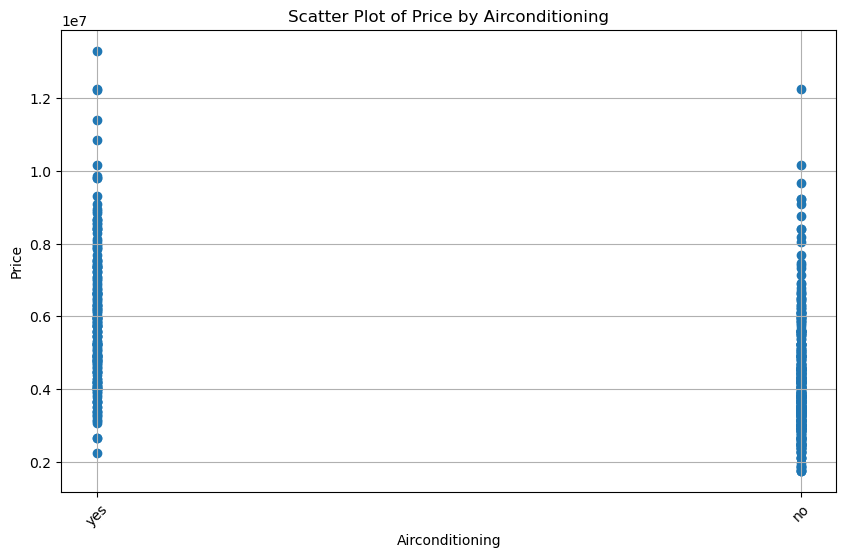

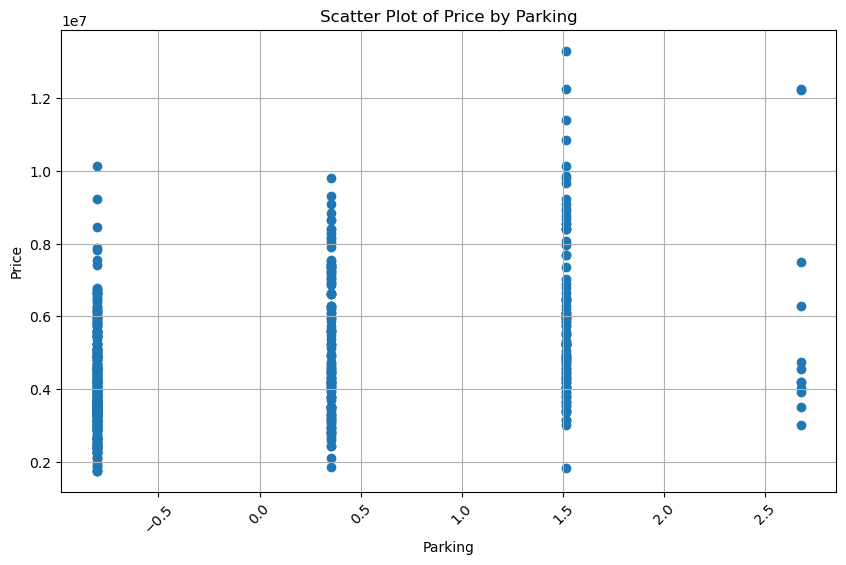

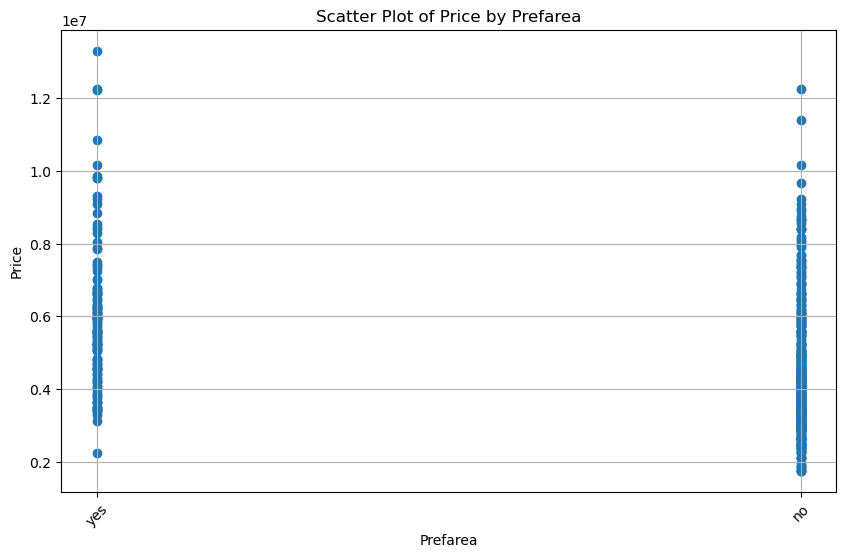

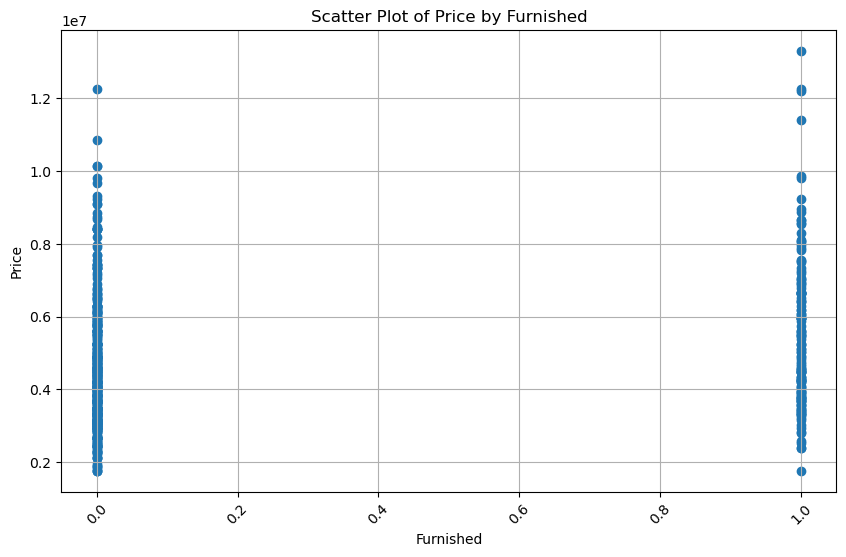

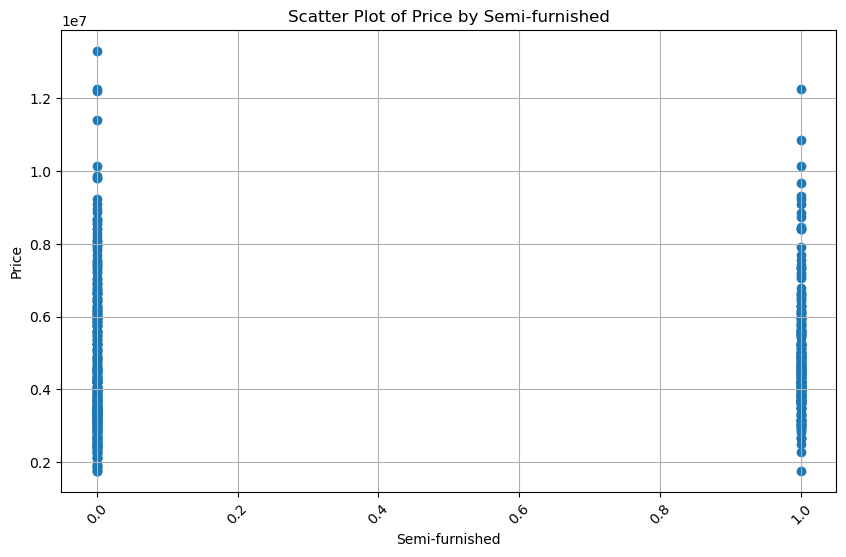

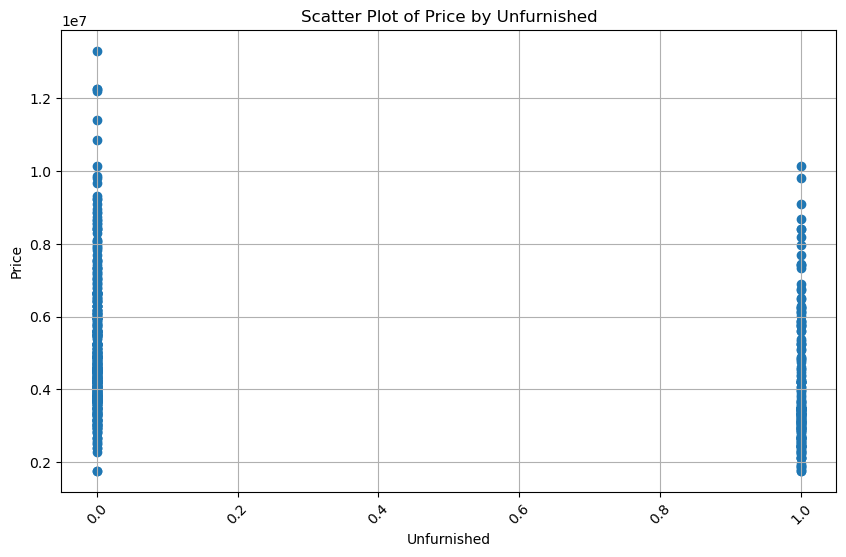

In [58]:
for i in columns21:
    x = df[i]
    y = df['price']
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y)
    plt.title(f'Scatter Plot of Price by {i.capitalize()}')
    plt.xlabel(i.capitalize())
    plt.ylabel('Price')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

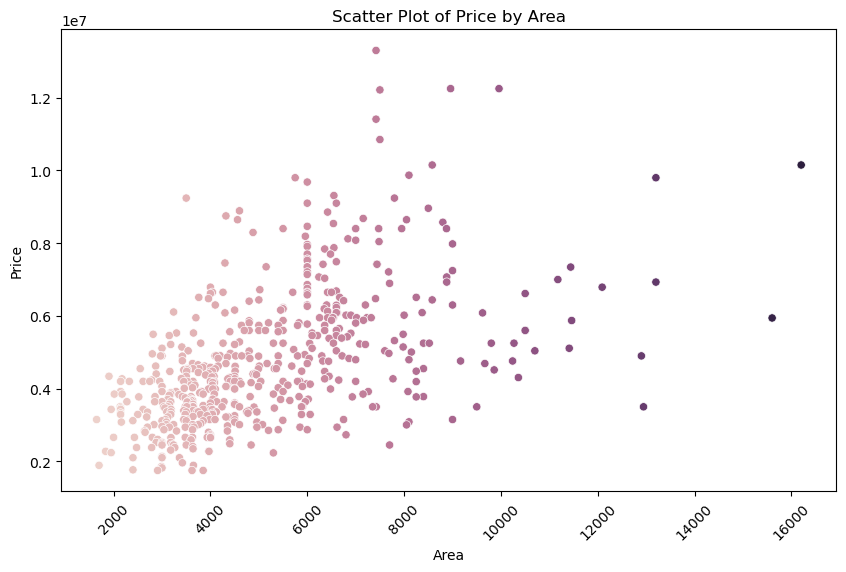

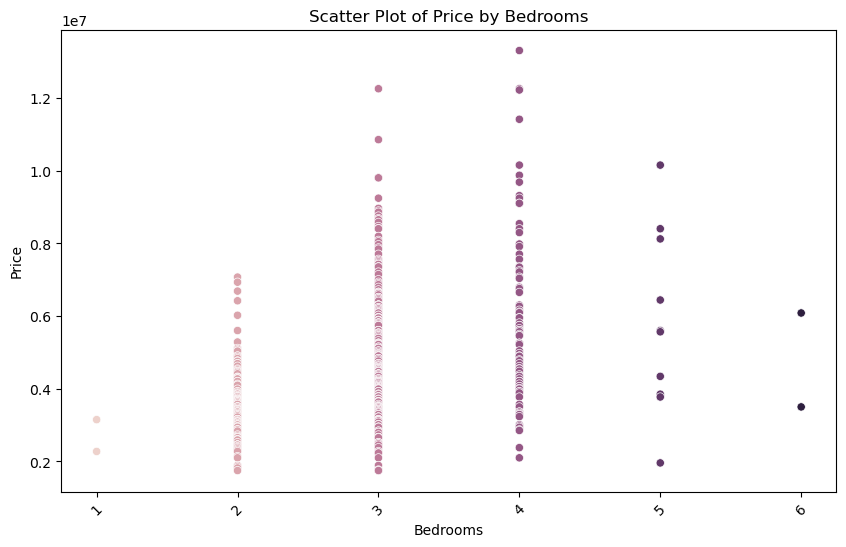

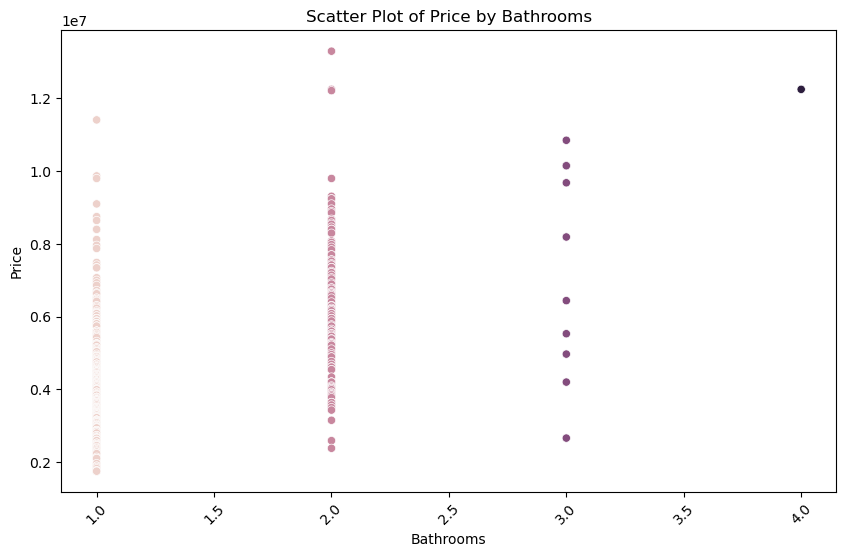

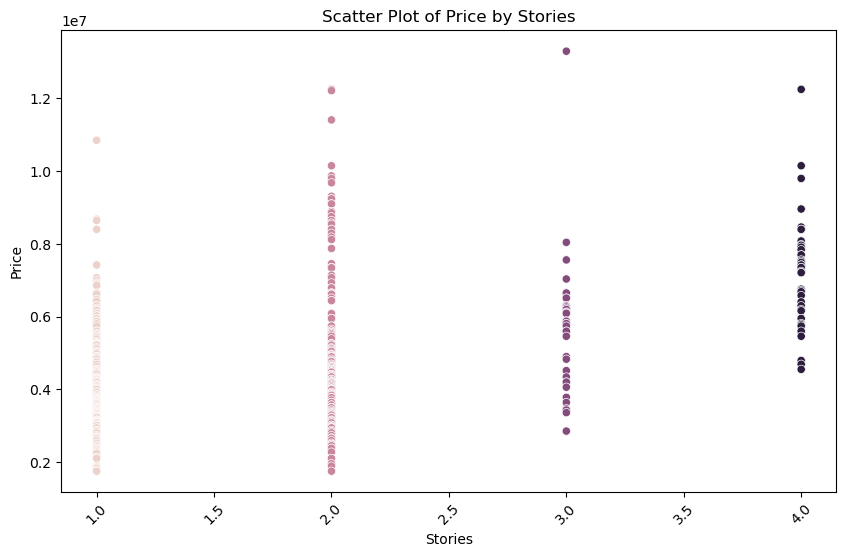

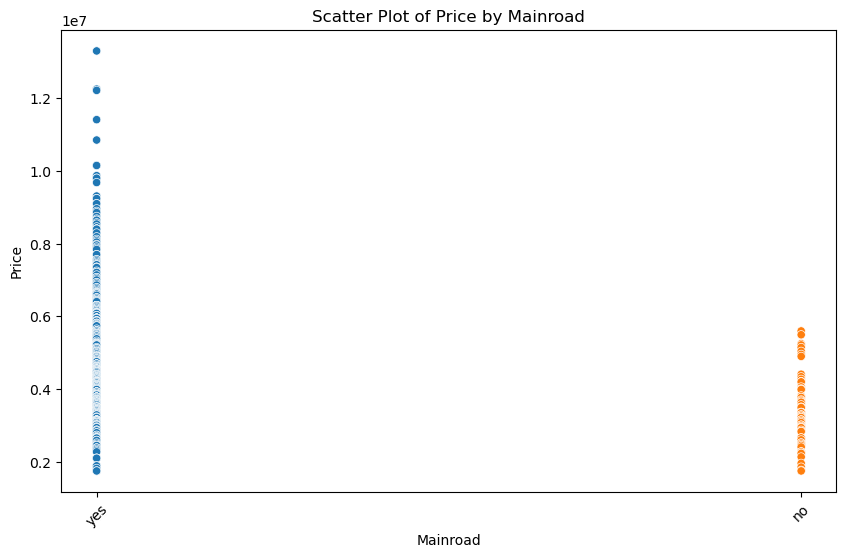

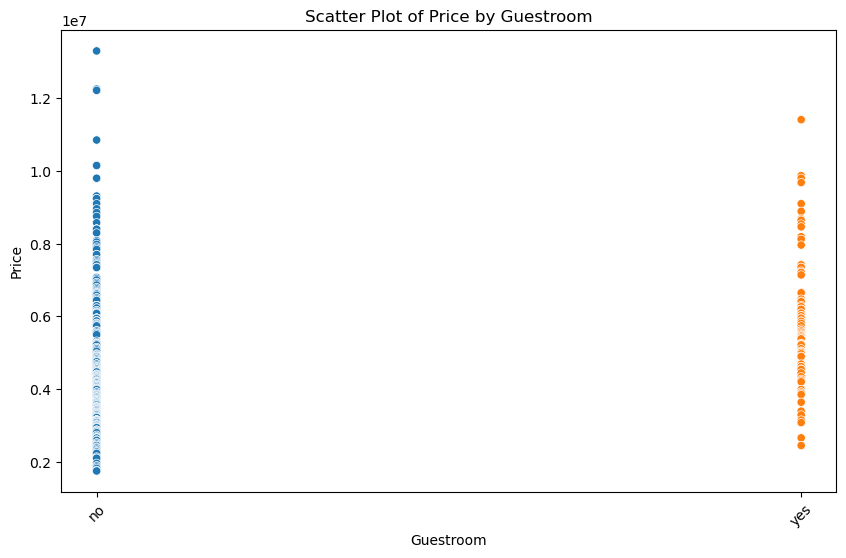

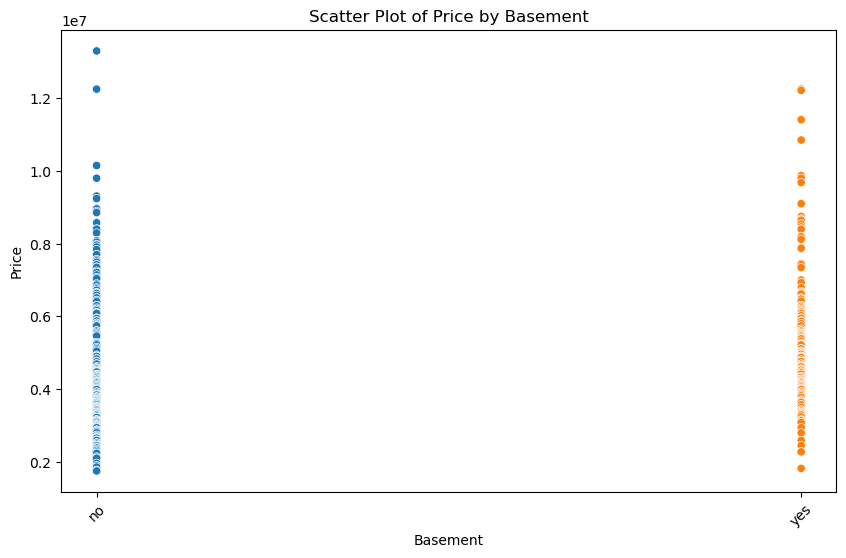

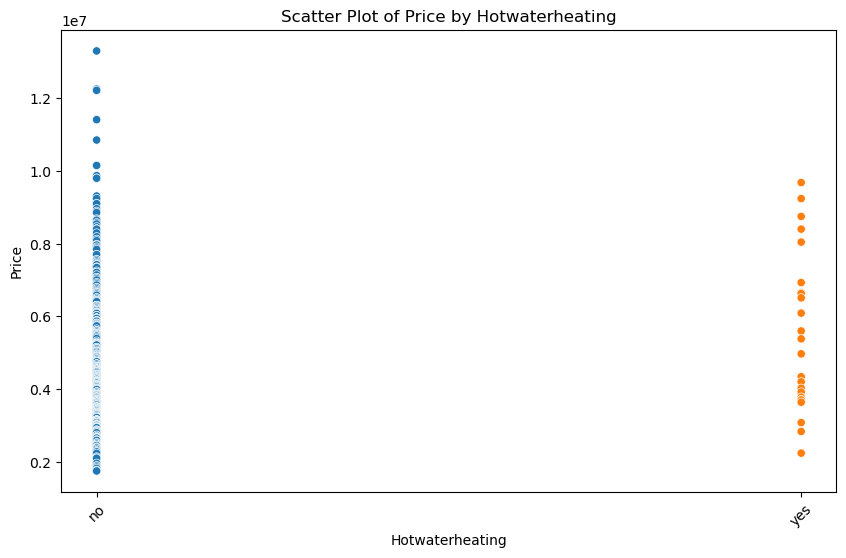

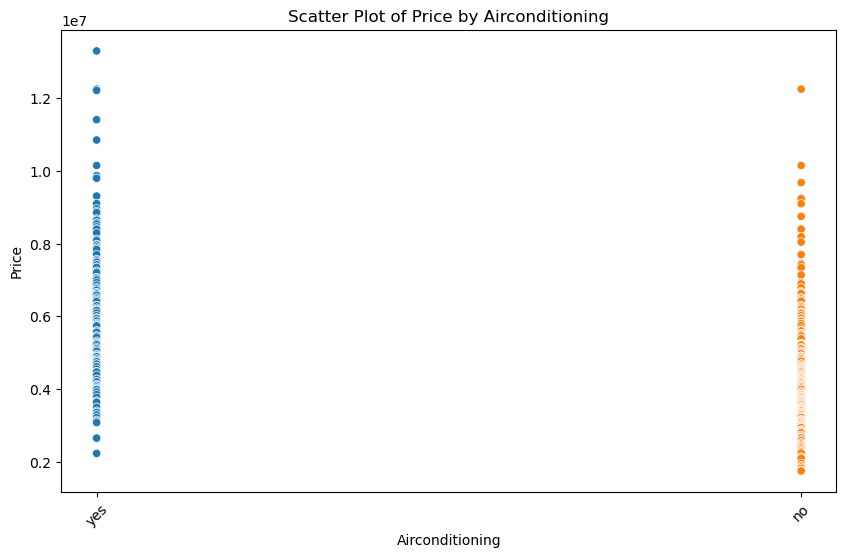

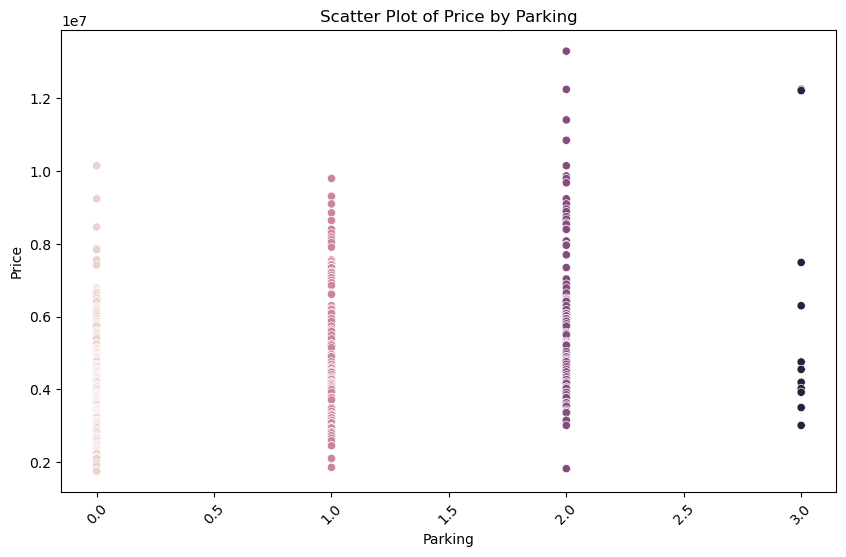

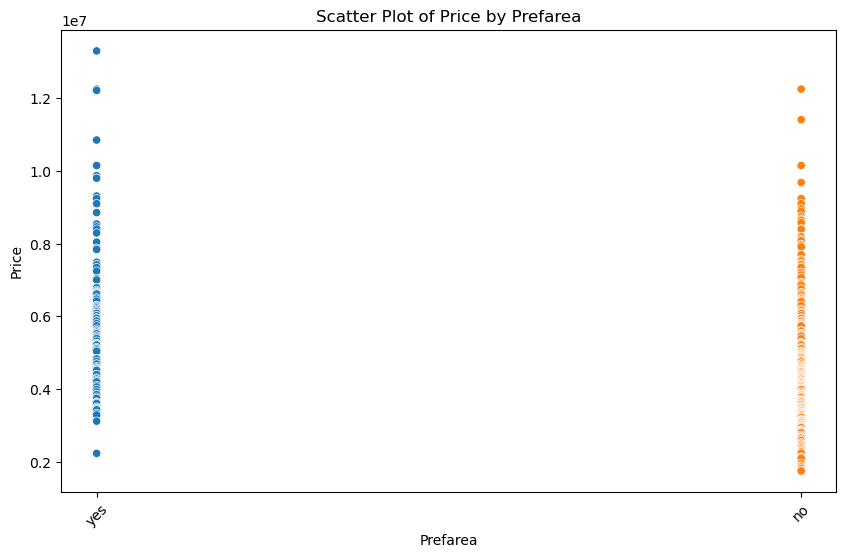

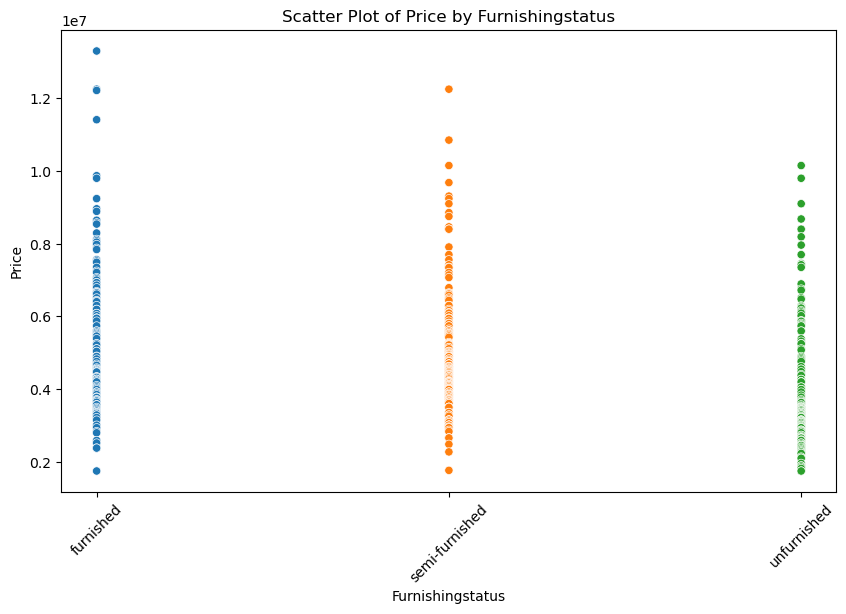

In [59]:
columns22 = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus']
for i in columns22:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=i, y='price', data=df2, hue=i, legend=False)
    plt.title(f'Scatter Plot of Price by {i.capitalize()}')
    plt.xlabel(i.capitalize())
    plt.ylabel('Price')
    plt.xticks(rotation=45)
    plt.show()

### Group by Analysis

In [60]:
df_area.head()

area     price area-binned
0  7420  13300000   6000-9000
1  8960  12250000   6000-9000
2  9960  12250000  9000-12000
3  7500  12215000   6000-9000
4  7420  11410000   6000-9000

In [61]:
df3["area-binned"] = pd.cut(df3['area'],bins,labels=group_names1, include_lowest=True)

In [62]:
df3.head()

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  \
0              no             yes        2      yes        furnished   
1              no             yes        3       no        furnished   
2              no              no        2      yes   semi-furnished   
3              no             yes        3      yes        furnished   
4              no             yes        2       no        furnished   

  area-binned  
0   6000-9000  
1   6000-9000  
2  9000-12000  
3   6000-9000  
4   6000-9000

In [63]:
df3_test = df3[['area-binned','furnishingstatus', 'price']].copy()
df3_test.head()

area-binned furnishingstatus     price
0   6000-9000        furnished  13300000
1   6000-9000        furnished  12250000
2  9000-12000   semi-furnished  12250000
3   6000-9000        furnished  12215000
4   6000-9000        furnished  11410000

In [64]:
df3_grp = df3_test.groupby(['area-binned','furnishingstatus'], as_index=False).mean()
df3_grp

area-binned furnishingstatus         price
0        0-3000        furnished  3.458778e+06
1        0-3000   semi-furnished  3.699818e+06
2        0-3000      unfurnished  3.011885e+06
3     3000-6000        furnished  4.973908e+06
4     3000-6000   semi-furnished  4.714255e+06
5     3000-6000      unfurnished  3.743588e+06
6     6000-9000        furnished  6.582906e+06
7     6000-9000   semi-furnished  5.756214e+06
8     6000-9000      unfurnished  5.819172e+06
9    9000-12000        furnished  6.202000e+06
10   9000-12000   semi-furnished  5.873000e+06
11   9000-12000      unfurnished  4.130000e+06
12  12000-15000        furnished  7.105000e+06
13  12000-15000   semi-furnished           NaN
14  12000-15000      unfurnished  3.500000e+06
15  15000-18000        furnished           NaN
16  15000-18000   semi-furnished  5.943000e+06
17  15000-18000      unfurnished  1.015000e+07

In [65]:
df3_pivot = df3_grp.pivot(index='furnishingstatus',columns='area-binned')
df3_pivot

price                                         \
area-binned             0-3000     3000-6000     6000-9000 9000-12000   
furnishingstatus                                                        
furnished         3.458778e+06  4.973908e+06  6.582906e+06  6202000.0   
semi-furnished    3.699818e+06  4.714255e+06  5.756214e+06  5873000.0   
unfurnished       3.011885e+06  3.743588e+06  5.819172e+06  4130000.0   

                                          
area-binned      12000-15000 15000-18000  
furnishingstatus                          
furnished          7105000.0         NaN  
semi-furnished           NaN   5943000.0  
unfurnished        3500000.0  10150000.0

In [66]:
df3_pivot2 = df3_grp.pivot(index='area-binned',columns='furnishingstatus')
df3_pivot2

price                             
furnishingstatus     furnished semi-furnished   unfurnished
area-binned                                                
0-3000            3.458778e+06   3.699818e+06  3.011885e+06
3000-6000         4.973908e+06   4.714255e+06  3.743588e+06
6000-9000         6.582906e+06   5.756214e+06  5.819172e+06
9000-12000        6.202000e+06   5.873000e+06  4.130000e+06
12000-15000       7.105000e+06            NaN  3.500000e+06
15000-18000                NaN   5.943000e+06  1.015000e+07

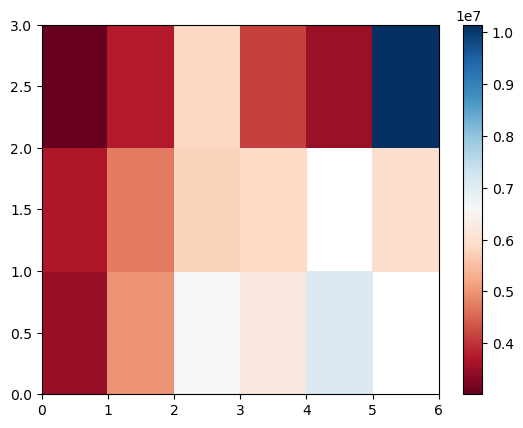

In [67]:
plt.pcolor(df3_pivot,cmap='RdBu')
plt.colorbar()
plt.show()

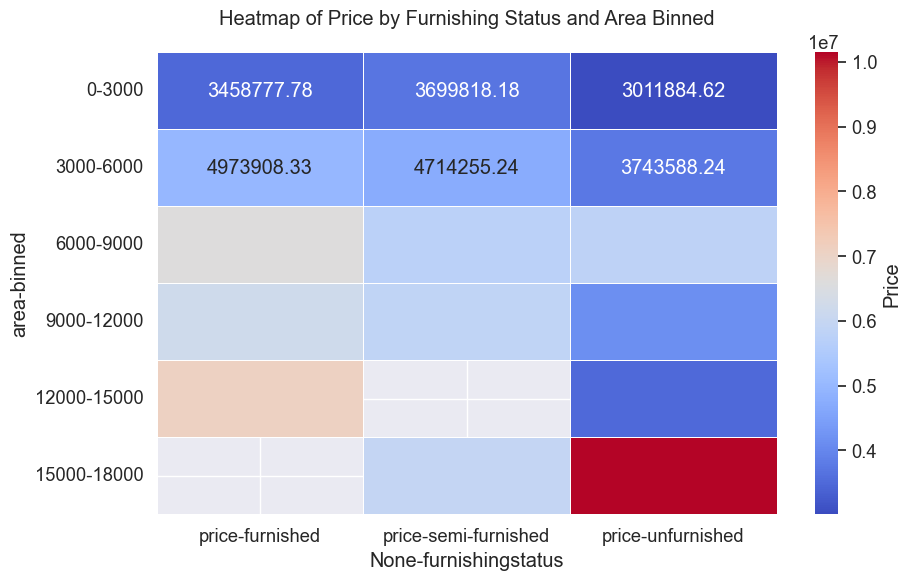

In [68]:
# Create heatmap using sns.heatmap
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.2)  # Adjust font scale for better readability
heatmap = sns.heatmap(df3_pivot2, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={'label': 'Price'})
heatmap.set_title('Heatmap of Price by Furnishing Status and Area Binned', pad=20)
plt.show()

In [69]:
df3_test1 = df3[['area-binned', 'bedrooms', 'price']].copy()
df3_test1.head()

area-binned  bedrooms     price
0   6000-9000         4  13300000
1   6000-9000         4  12250000
2  9000-12000         3  12250000
3   6000-9000         4  12215000
4   6000-9000         4  11410000

In [70]:
df3_grp1 = df3_test1.groupby(['area-binned', 'bedrooms'], as_index=False).mean()
df3_grp1

area-binned  bedrooms         price
0        0-3000         1           NaN
1        0-3000         2  2.863824e+06
2        0-3000         3  3.470250e+06
3        0-3000         4  3.765000e+06
4        0-3000         5  4.056500e+06
5        0-3000         6           NaN
6     3000-6000         1  2.712500e+06
7     3000-6000         2  3.539083e+06
8     3000-6000         3  4.682849e+06
9     3000-6000         4  5.137562e+06
10    3000-6000         5  4.243750e+06
11    3000-6000         6  4.791500e+06
12    6000-9000         1           NaN
13    6000-9000         2  4.356059e+06
14    6000-9000         3  5.984458e+06
15    6000-9000         4  7.429463e+06
16    6000-9000         5  7.653333e+06
17    6000-9000         6           NaN
18   9000-12000         1           NaN
19   9000-12000         2  4.907000e+06
20   9000-12000         3  6.236222e+06
21   9000-12000         4  5.720750e+06
22   9000-12000         5           NaN
23   9000-12000         6           NaN
24  12000-15000         1           NaN
25  12000-15000         2  6.930000e+06
26  12000-15000         3  6.066667e+06
27  12000-15000         4  6.790000e+06
28  12000-15000         5           NaN
29  12000-15000         6           NaN
30  15000-18000         1           NaN
31  15000-18000         2           NaN
32  15000-18000         3  5.943000e+06
33  15000-18000         4           NaN
34  15000-18000         5  1.015000e+07
35  15000-18000         6           NaN

In [71]:
df3_pivot21 = df3_grp1.pivot(index='bedrooms',columns='area-binned')
df3_pivot21

price                                            \
area-binned        0-3000     3000-6000     6000-9000    9000-12000   
bedrooms                                                              
1                     NaN  2.712500e+06           NaN           NaN   
2            2.863824e+06  3.539083e+06  4.356059e+06  4.907000e+06   
3            3.470250e+06  4.682849e+06  5.984458e+06  6.236222e+06   
4            3.765000e+06  5.137562e+06  7.429463e+06  5.720750e+06   
5            4.056500e+06  4.243750e+06  7.653333e+06           NaN   
6                     NaN  4.791500e+06           NaN           NaN   

                                       
area-binned   12000-15000 15000-18000  
bedrooms                               
1                     NaN         NaN  
2            6.930000e+06         NaN  
3            6.066667e+06   5943000.0  
4            6.790000e+06         NaN  
5                     NaN  10150000.0  
6                     NaN         NaN

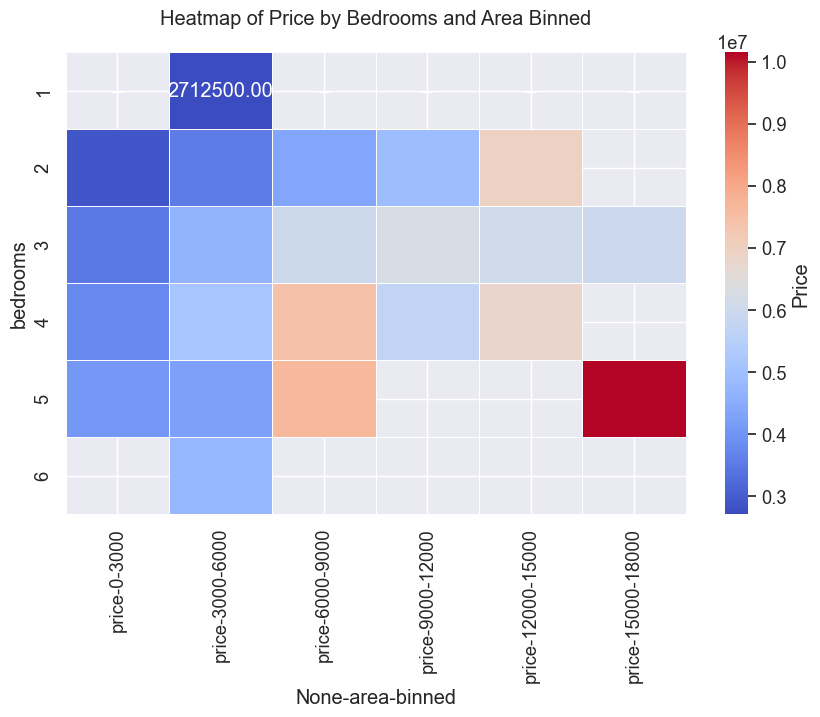

In [72]:
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.2)  # Adjust font scale for better readability
heatmap = sns.heatmap(df3_pivot21, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={'label': 'Price'})
heatmap.set_title('Heatmap of Price by Bedrooms and Area Binned', pad=20)
plt.show()

In [73]:
df3_pivot12 = df3_grp1.pivot(index='area-binned',columns='bedrooms')
df3_pivot12

price                                            \
bedrooms             1             2             3             4   
area-binned                                                        
0-3000             NaN  2.863824e+06  3.470250e+06  3.765000e+06   
3000-6000    2712500.0  3.539083e+06  4.682849e+06  5.137562e+06   
6000-9000          NaN  4.356059e+06  5.984458e+06  7.429463e+06   
9000-12000         NaN  4.907000e+06  6.236222e+06  5.720750e+06   
12000-15000        NaN  6.930000e+06  6.066667e+06  6.790000e+06   
15000-18000        NaN           NaN  5.943000e+06           NaN   

                                      
bedrooms                5          6  
area-binned                           
0-3000       4.056500e+06        NaN  
3000-6000    4.243750e+06  4791500.0  
6000-9000    7.653333e+06        NaN  
9000-12000            NaN        NaN  
12000-15000           NaN        NaN  
15000-18000  1.015000e+07        NaN

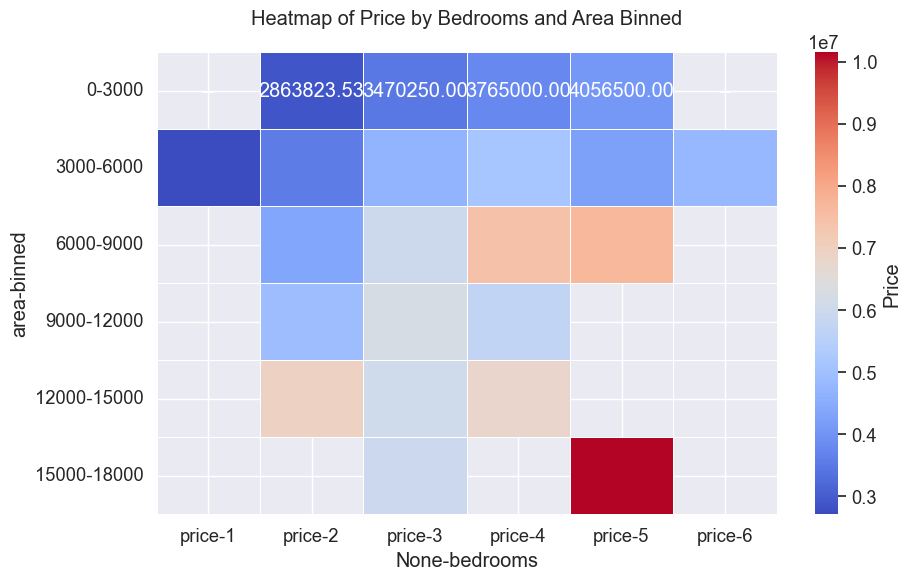

In [74]:
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.2)  # Adjust font scale for better readability
heatmap = sns.heatmap(df3_pivot12, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={'label': 'Price'})
heatmap.set_title('Heatmap of Price by Bedrooms and Area Binned', pad=20)
plt.show()

### Corelation Analysis

In [75]:
df.dtypes

price                 int64
area                float64
bedrooms            float64
bathrooms           float64
stories             float64
mainroad             object
guestroom            object
basement             object
hotwaterheating      object
airconditioning      object
parking             float64
prefarea             object
price-binned       category
furnished              bool
semi-furnished         bool
unfurnished            bool
dtype: object

In [76]:
columns61 = ['mainroad','guestroom', 'basement', 'hotwaterheating', 'airconditioning','prefarea']
mapping = {'no': 0, 'yes': 1}
for i in columns61:
# Apply Label Encoding to 'mainroad' and 'guestroom' columns
    df[i] = df[i].map(mapping)

df.head()

price      area  bedrooms  bathrooms   stories  mainroad  guestroom  \
0  13300000  1.045766  1.402131   1.420507  1.376952         1          0   
1  12250000  1.755397  1.402131   5.400847  2.529700         1          0   
2  12250000  2.216196  0.047235   1.420507  0.224204         1          0   
3  12215000  1.082630  1.402131   1.420507  0.224204         1          0   
4  11410000  1.045766  1.402131  -0.569663  0.224204         1          1   

   basement  hotwaterheating  airconditioning   parking  prefarea  \
0         0                0                1  1.516299         1   
1         0                0                1  2.676950         0   
2         1                0                0  1.516299         1   
3         1                0                1  2.676950         1   
4         1                0                1  1.516299         0   

  price-binned  furnished  semi-furnished  unfurnished  
0         High       True           False        False  
1         High       True           False        False  
2         High      False            True        False  
3         High       True           False        False  
4         High       True           False        False

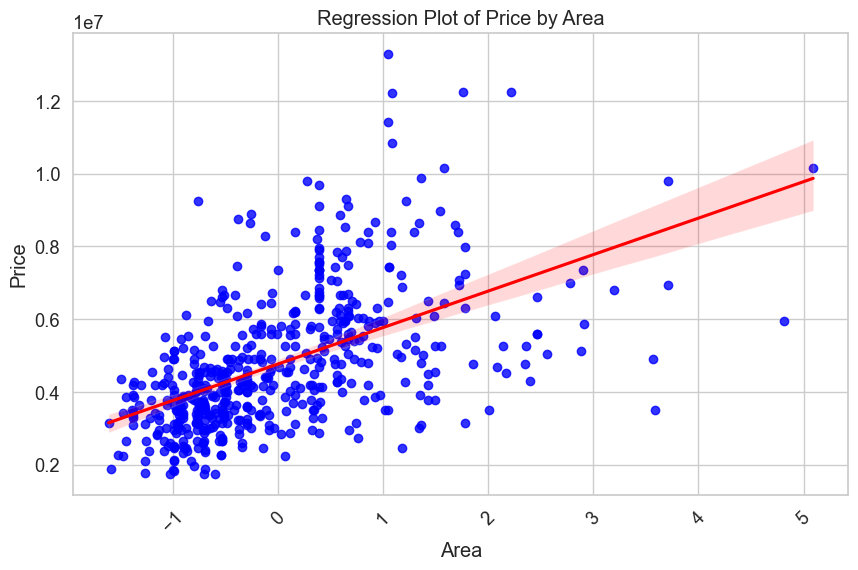

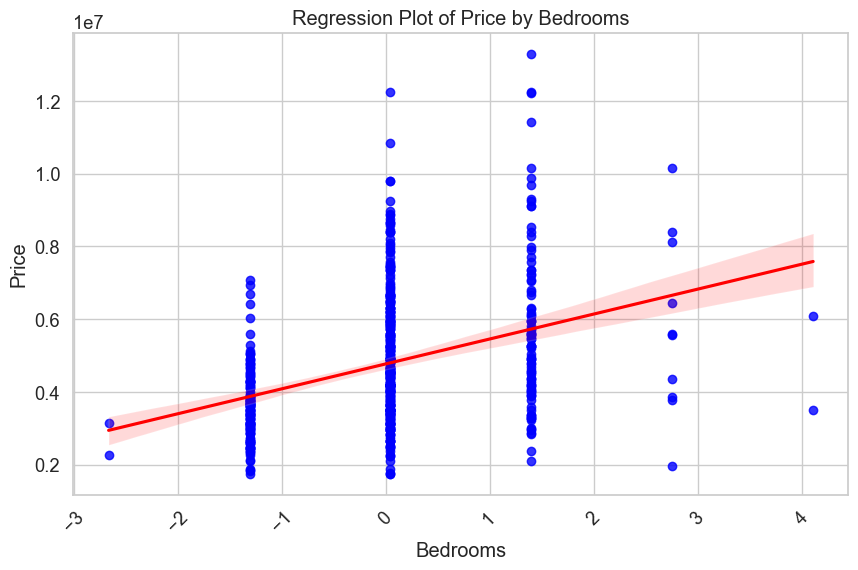

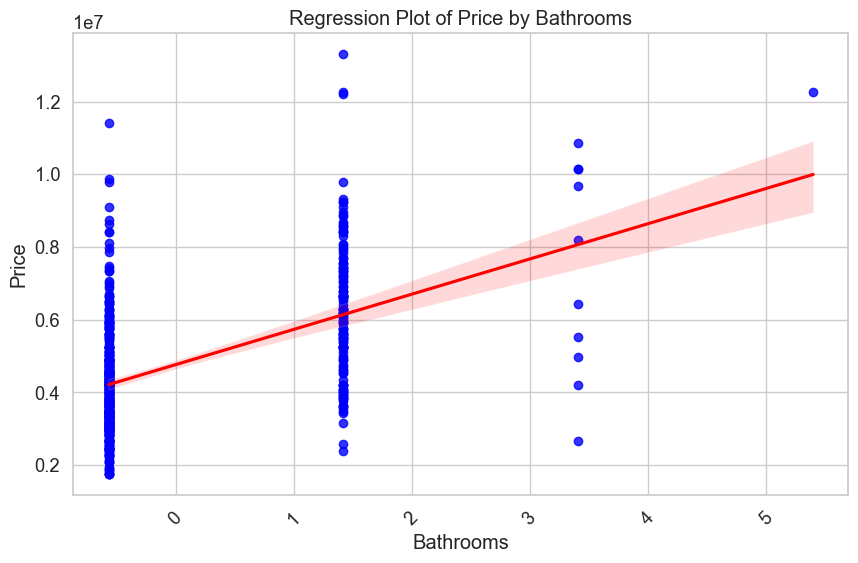

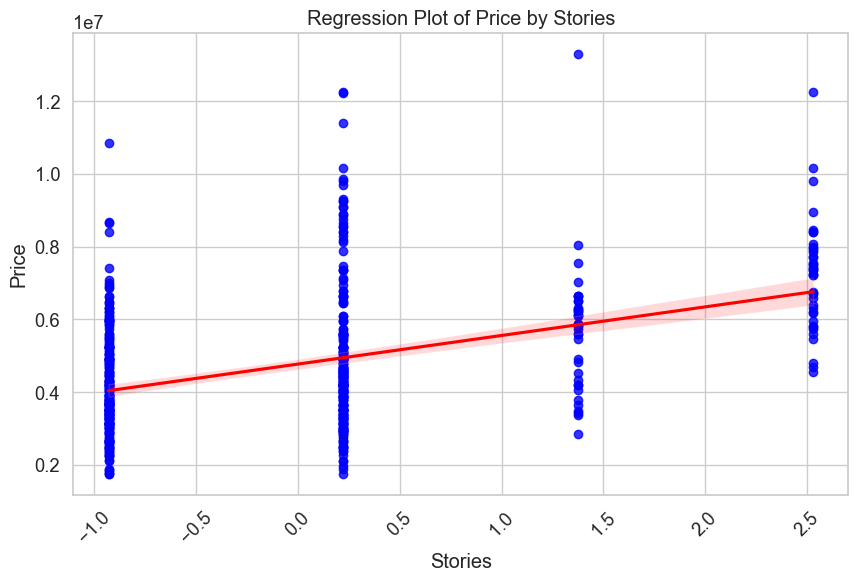

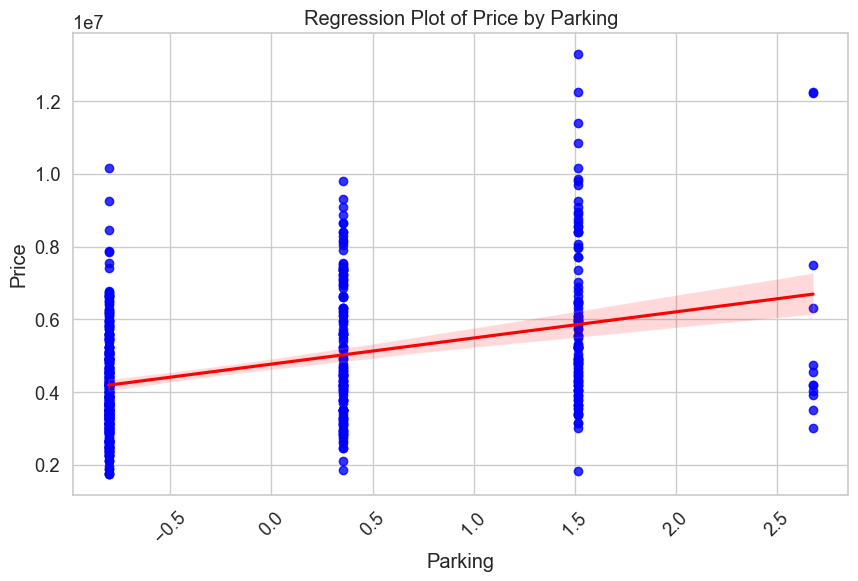

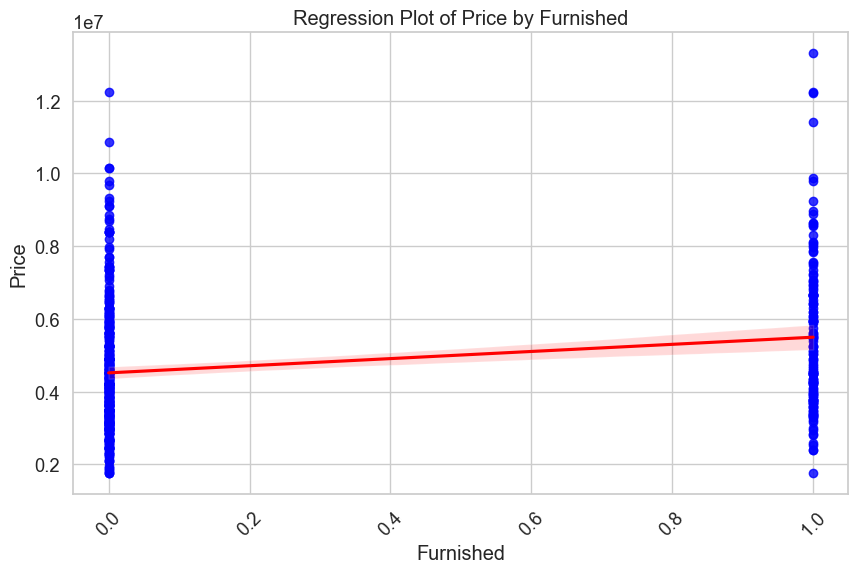

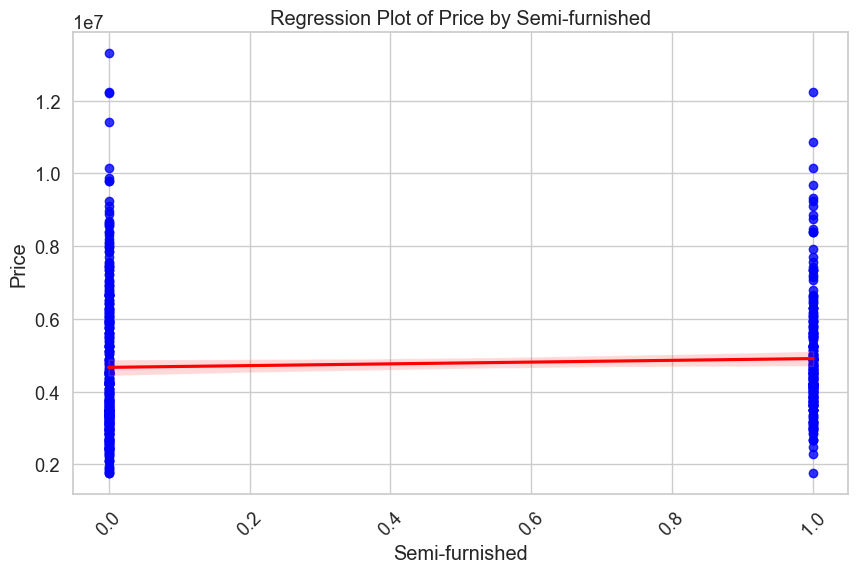

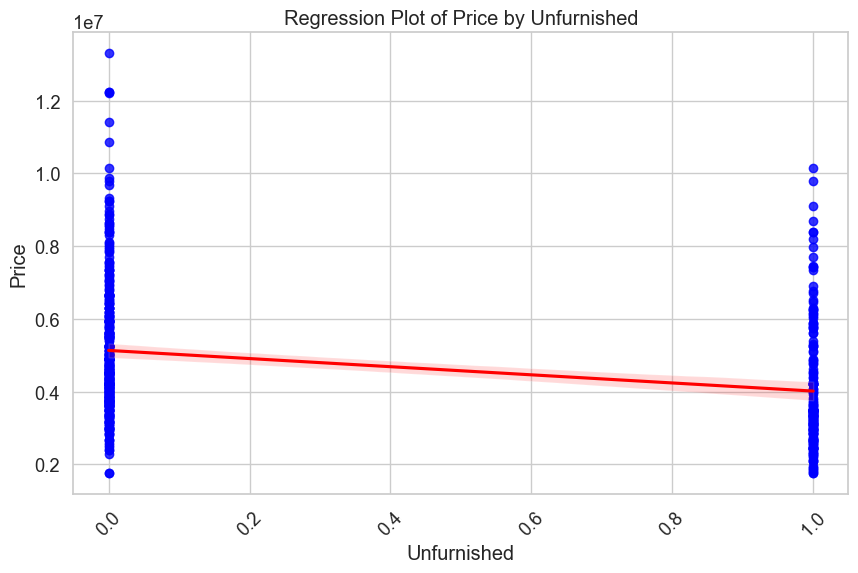

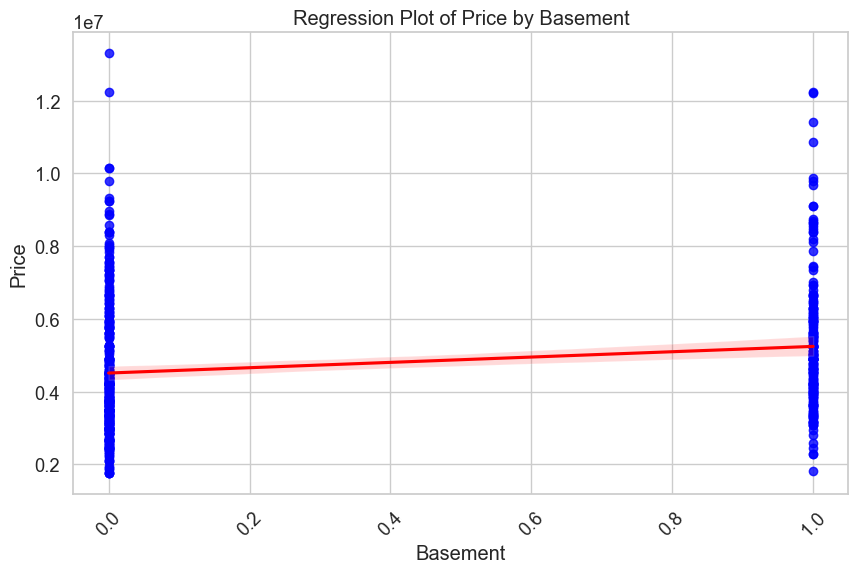

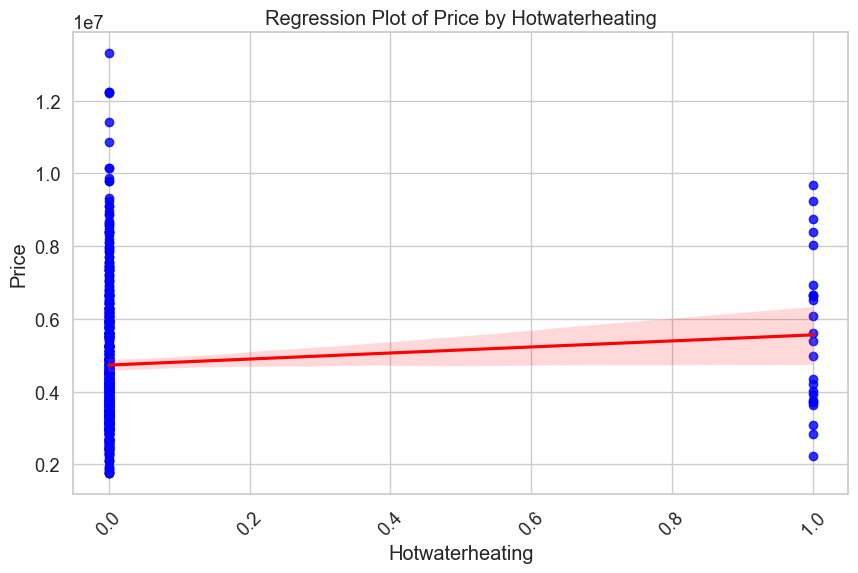

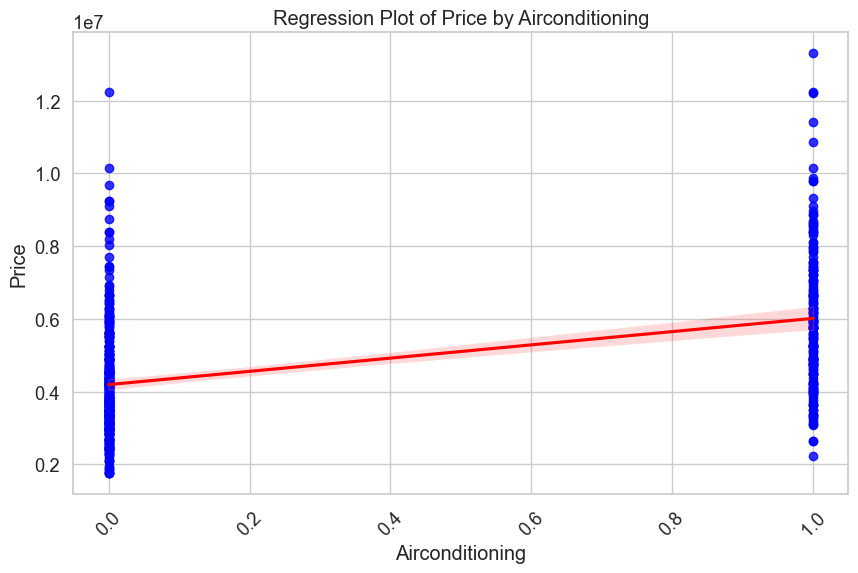

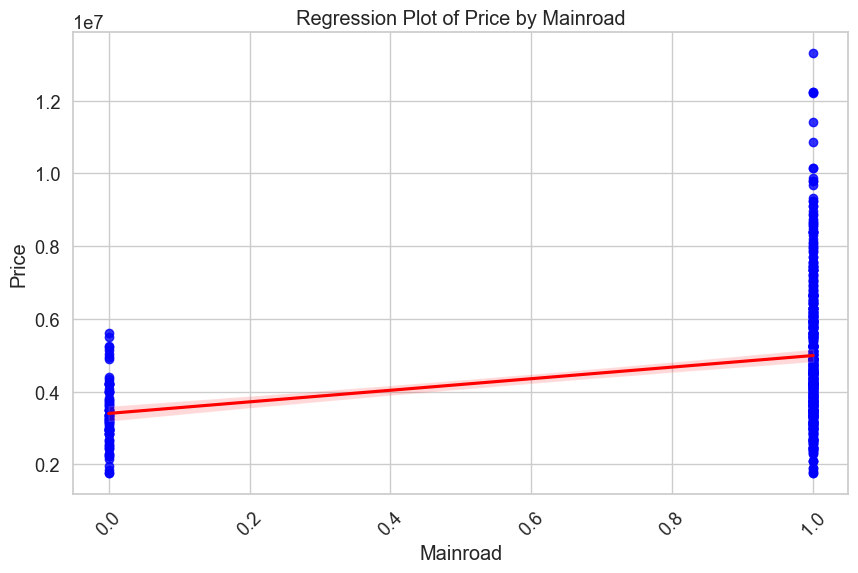

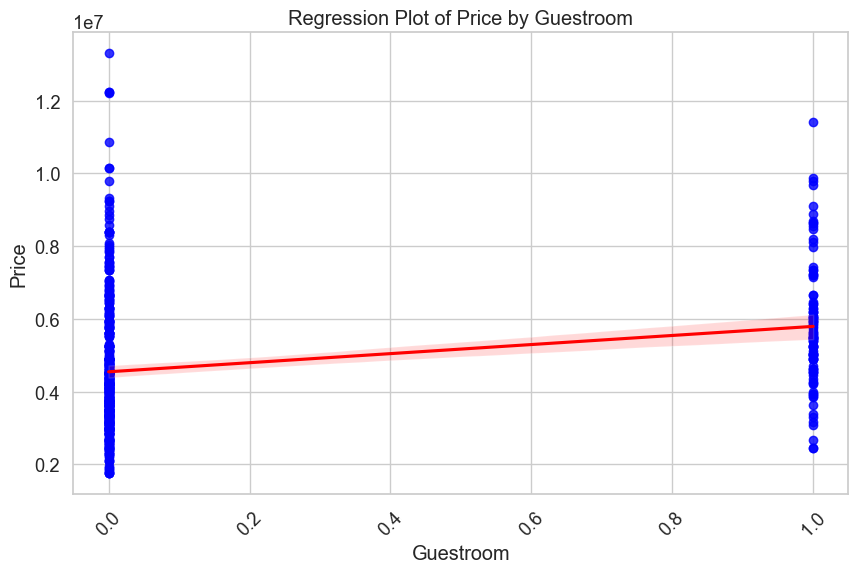

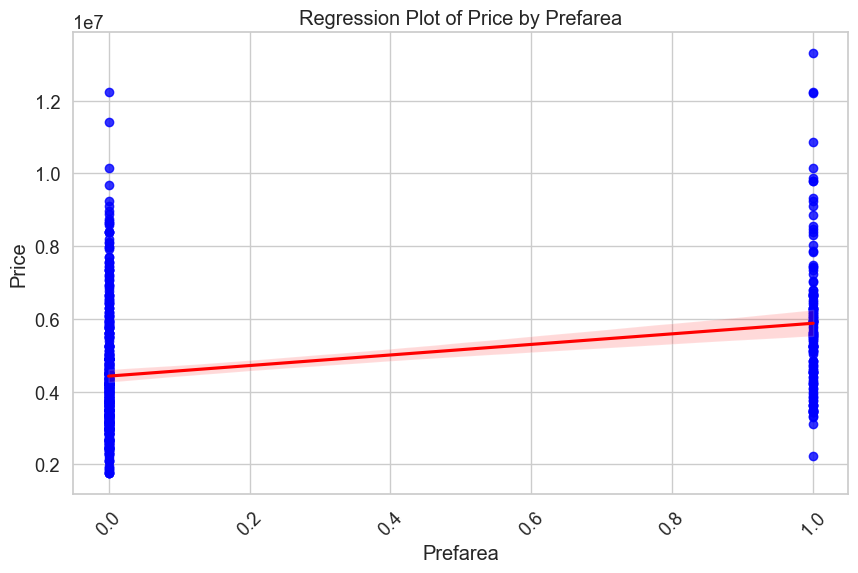

In [77]:
columns51 = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'furnished', 'semi-furnished',
             'unfurnished', 'basement', 'hotwaterheating', 'airconditioning', 'mainroad', 'guestroom', 'prefarea']

# Set style
sns.set_style("whitegrid")

for i in columns51:
    plt.figure(figsize=(10, 6))
    sns.regplot(x=i, y='price', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
    plt.title(f'Regression Plot of Price by {i.capitalize()}')
    plt.xlabel(i.capitalize())
    plt.ylabel('Price')
    plt.xticks(rotation=45)
    plt.show()


How much does your house cost? Well, it depends on a few attributes, like how big it is(area), how many rooms it has, and how many bathrooms it has. That's what the Regression plot analysis tells us. It shows us that these three factors are the most important ones for determining the Housing prices.

### Correlation Statistics

In [78]:
pearson_coef, p_val = stats.pearsonr(df['area'],df['price'])

In [79]:
print('Pearson coef is: ',pearson_coef,' and p-value is: ',p_val)

Pearson coef is:  0.5359973457780801  and p-value is:  7.388225401521874e-42


In [80]:
columns21
for i in columns21:
    pearson_coef, p_val = stats.pearsonr(df[i],df['price'])
    print('For ', i, 'Pearson coef is: ',pearson_coef,' and p-value is: ',p_val)

For  area Pearson coef is:  0.5359973457780801  and p-value is:  7.388225401521874e-42
For  bedrooms Pearson coef is:  0.3664940257738684  and p-value is:  9.080301855811585e-19
For  bathrooms Pearson coef is:  0.5175453394550114  and p-value is:  1.1393218375124884e-38
For  stories Pearson coef is:  0.42071236618861674  and p-value is:  8.668397383952869e-25
For  mainroad Pearson coef is:  0.29689848926397644  and p-value is:  1.490104148890574e-12
For  guestroom Pearson coef is:  0.2555172899350002  and p-value is:  1.429113638557962e-09
For  basement Pearson coef is:  0.18705659793805282  and p-value is:  1.1041051901314558e-05
For  hotwaterheating Pearson coef is:  0.09307284392139703  and p-value is:  0.02981523896601973
For  airconditioning Pearson coef is:  0.45295408425604833  and p-value is:  6.310969853529858e-29
For  parking Pearson coef is:  0.38439364863572634  and p-value is:  1.2383784426342813e-20
For  prefarea Pearson coef is:  0.3297770498681075  and p-value is:  2.71

The area of the house has a moderate positive relationship with its price, according to the correlation coefficient of 0.536. This means that bigger houses tend to be more expensive, but not always. The p-value is very low (<0.001), which means we can be very confident about this finding. The same goes for the number of bathrooms, which has a correlation coefficient of 0.517 with the price. More bathrooms usually mean higher prices, and the low p-value (<0.001) confirms this. The number of bedrooms, however, has a weaker positive relationship with the price, with a correlation coefficient of 0.366. This means that having more bedrooms does not necessarily increase the price much, and the low p-value (<0.001) shows that this is not a random result.

In [81]:
df_corr = df.copy()
df_corr.head()

price      area  bedrooms  bathrooms   stories  mainroad  guestroom  \
0  13300000  1.045766  1.402131   1.420507  1.376952         1          0   
1  12250000  1.755397  1.402131   5.400847  2.529700         1          0   
2  12250000  2.216196  0.047235   1.420507  0.224204         1          0   
3  12215000  1.082630  1.402131   1.420507  0.224204         1          0   
4  11410000  1.045766  1.402131  -0.569663  0.224204         1          1   

   basement  hotwaterheating  airconditioning   parking  prefarea  \
0         0                0                1  1.516299         1   
1         0                0                1  2.676950         0   
2         1                0                0  1.516299         1   
3         1                0                1  2.676950         1   
4         1                0                1  1.516299         0   

  price-binned  furnished  semi-furnished  unfurnished  
0         High       True           False        False  
1         High       True           False        False  
2         High      False            True        False  
3         High       True           False        False  
4         High       True           False        False

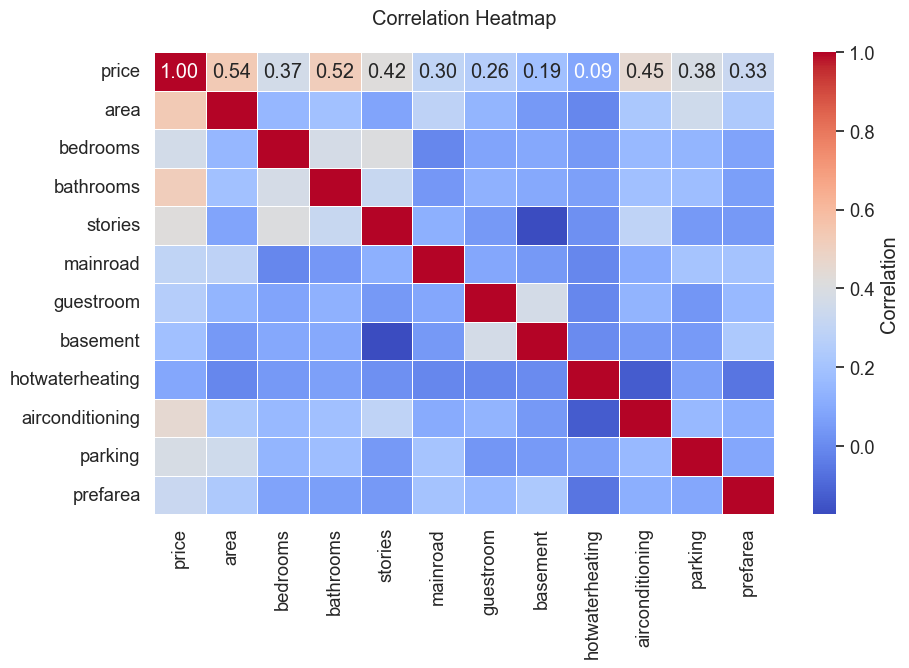

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude non-numeric columns
numeric_columns = df_corr.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
corr_matrix = df_corr[numeric_columns].corr()

# Generate the correlation heatmap
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.2)  # Adjust font scale for better readability
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={'label': 'Correlation'})
heatmap.set_title('Correlation Heatmap', pad=20)
plt.show()



#### Using some better colors for the plot

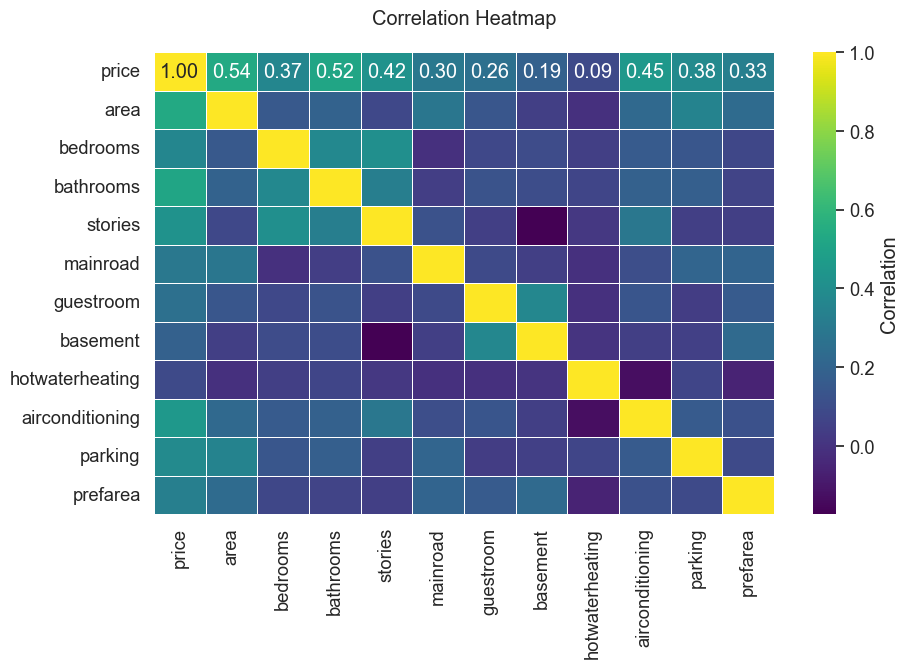

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude non-numeric columns
numeric_columns = df_corr.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
corr_matrix = df_corr[numeric_columns].corr()

# Generate the correlation heatmap with an eye-pleasing colormap
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.2)  # Adjust font scale for better readability
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5, cbar_kws={'label': 'Correlation'})
heatmap.set_title('Correlation Heatmap', pad=20)
plt.show()


## Model Development

## Simple Linear Regression

In [84]:
df.head()

price      area  bedrooms  bathrooms   stories  mainroad  guestroom  \
0  13300000  1.045766  1.402131   1.420507  1.376952         1          0   
1  12250000  1.755397  1.402131   5.400847  2.529700         1          0   
2  12250000  2.216196  0.047235   1.420507  0.224204         1          0   
3  12215000  1.082630  1.402131   1.420507  0.224204         1          0   
4  11410000  1.045766  1.402131  -0.569663  0.224204         1          1   

   basement  hotwaterheating  airconditioning   parking  prefarea  \
0         0                0                1  1.516299         1   
1         0                0                1  2.676950         0   
2         1                0                0  1.516299         1   
3         1                0                1  2.676950         1   
4         1                0                1  1.516299         0   

  price-binned  furnished  semi-furnished  unfurnished  
0         High       True           False        False  
1         High       True           False        False  
2         High      False            True        False  
3         High       True           False        False  
4         High       True           False        False

### Importing the Linear model

In [85]:
from sklearn.linear_model import LinearRegression

### Creating a Linear Regression Object

In [86]:
lm = LinearRegression()

### Defining the predictor and target variable

In [87]:
X = df['area']
Y = df['price']

In [88]:
X_reshaped = X.values.reshape(-1, 1)

In [89]:
Y.shape

(545,)

In [90]:
X_reshaped.shape

(545, 1)

In [91]:
lm.fit(X_reshaped,Y)

LinearRegression()

In [92]:
lm.score(X_reshaped, Y)

0.2872931546811469

### Obtaining the Predictions

In [93]:
Yhat = lm.predict(X_reshaped)

In [94]:
Yhat[0:10]

array([5815162.19790048, 6526603.53508057, 6988578.42935335,
       5852120.1894423 , 5815162.19790048, 5852120.1894423 ,
       6351053.07525691, 9871301.76961552, 6129305.12600598,
       5043664.12446493])

In [95]:
round(lm.intercept_,3)

4766729.248

In [96]:
np.round(lm.coef_,3)

array([1002550.669])

### The Equaiton

Yhat = 2387308.482 + (461.975*area)

### Multiple Linear Regression

In [97]:
Z = df[['area', 'bedrooms', 'bathrooms', 'stories']]
Y = df['price']

In [98]:
Z.shape

(545, 4)

In [99]:
lm_multi = LinearRegression()

In [100]:
lm_multi.fit(Z,Y)

LinearRegression()

In [101]:
lm_multi.score(Z,Y)

0.5355960442835981

In [102]:
Yhat_multi = lm_multi.predict(Z)

In [103]:
Yhat_multi[0:10]

array([ 7326017.9251189 , 10843211.5019276 ,  7561389.47225781,
        6824824.87028827,  5594242.44267014,  7295114.84034423,
        9498621.74552691, 11529513.37230633,  5852659.0545773 ,
        7024676.64335441])

In [104]:
lm_multi.intercept_

4766729.247706422

In [105]:
lm_multi.coef_

array([824706.60352566, 146354.73787006, 603054.22160162, 461154.6637861 ])

### The Multiple Linear regression equation

Yhat = 4766729.248 + [(824706.60 * area)+(146354.74 * bedrooms)+(603054.22 * bathrooms)+(461154.66 * stories)]

## Model evaluation with Visualization

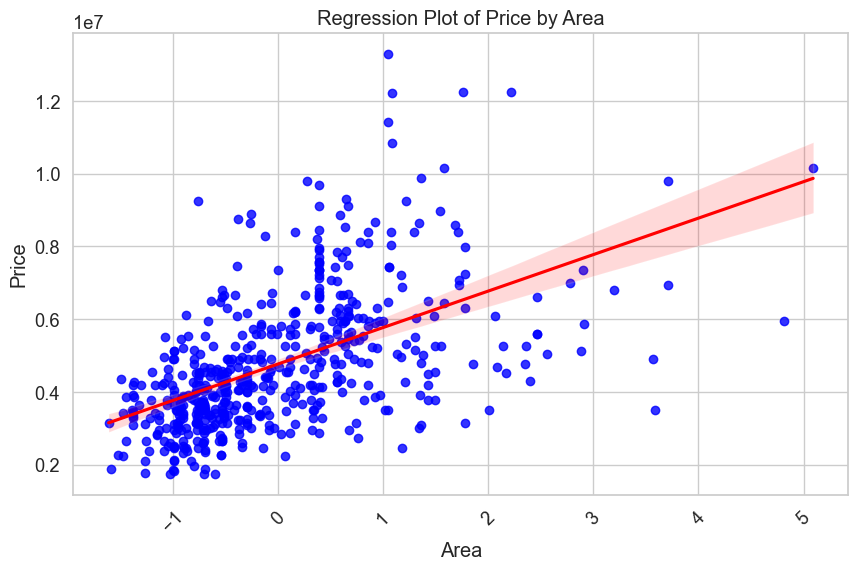

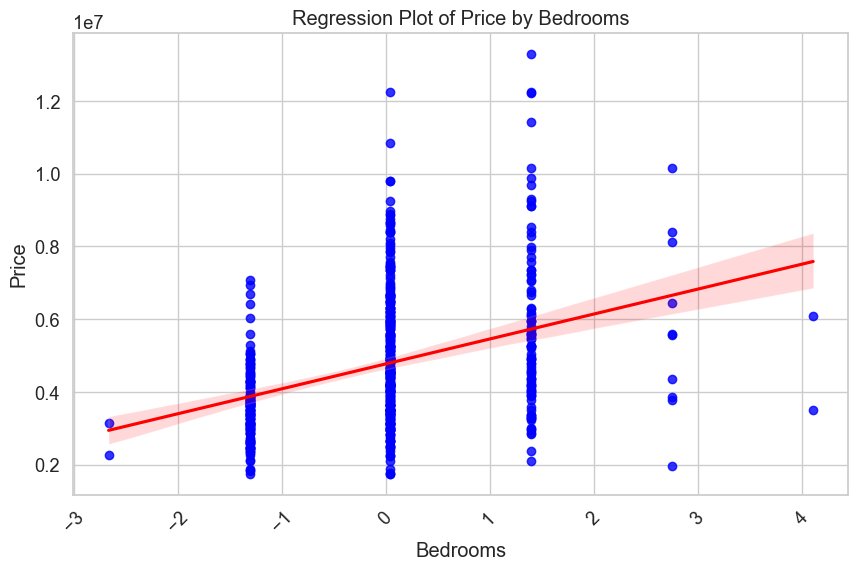

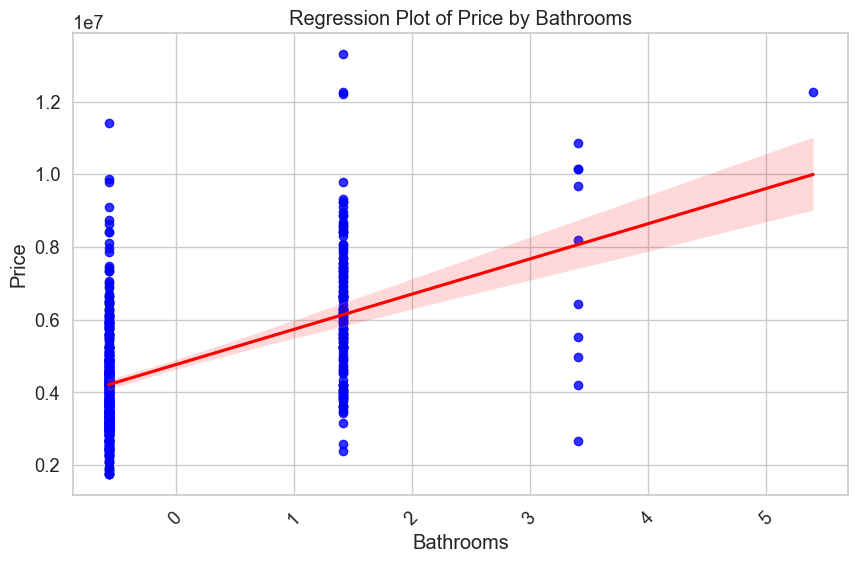

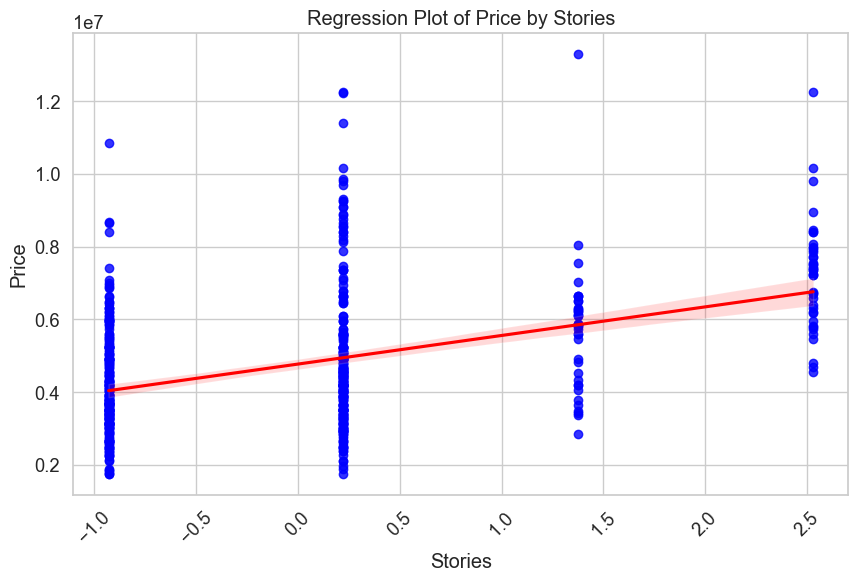

In [106]:
columns61 = ['area', 'bedrooms', 'bathrooms', 'stories']

# Set style
sns.set_style("whitegrid")

for i in columns61:
    plt.figure(figsize=(10, 6))
    sns.regplot(x=i, y='price', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
    plt.title(f'Regression Plot of Price by {i.capitalize()}')
    plt.xlabel(i.capitalize())
    plt.ylabel('Price')
    plt.xticks(rotation=45)
    plt.show()

### Residual Plot to check if the linear model is right fit or not

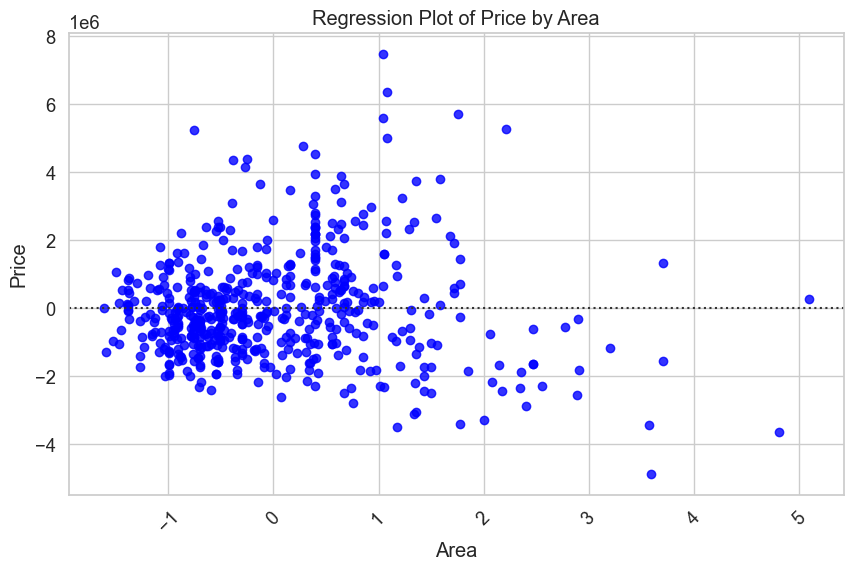

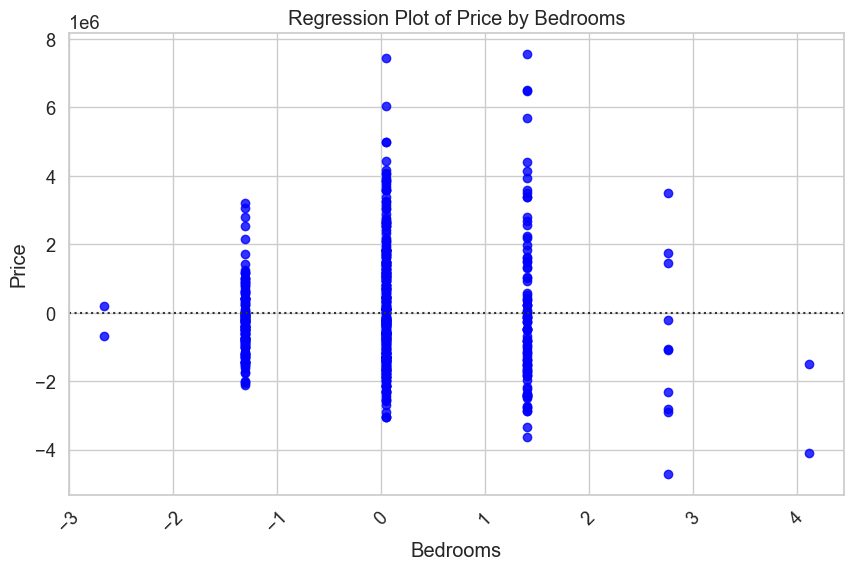

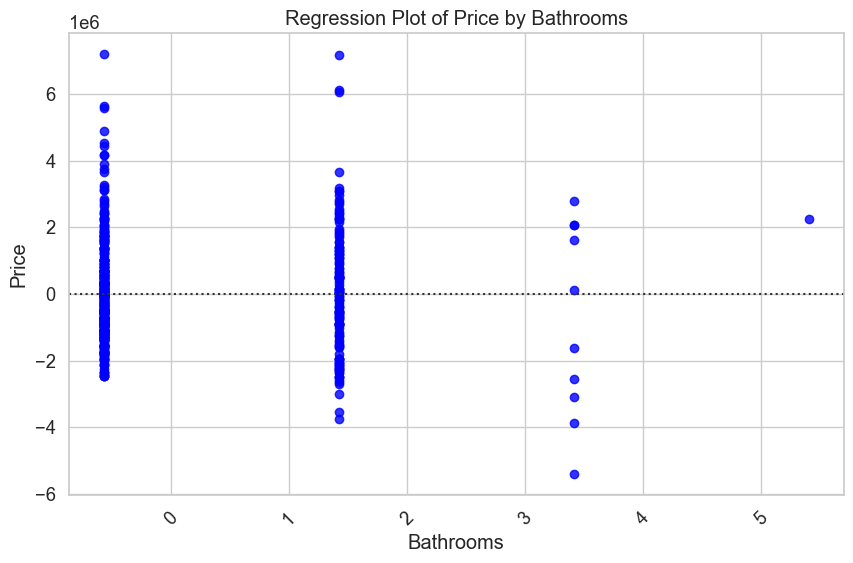

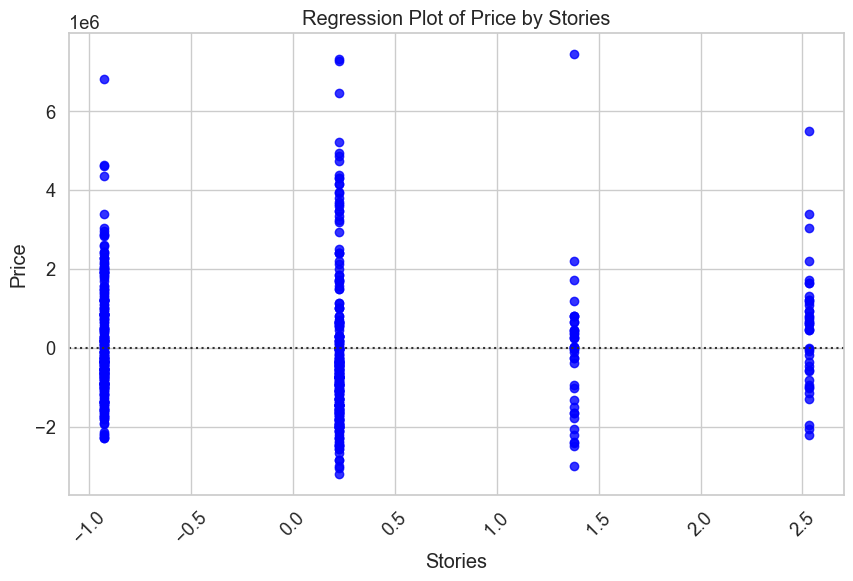

In [107]:
for i in columns61:
    plt.figure(figsize=(10, 6))
    sns.residplot(x=i, y='price', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
    plt.title(f'Regression Plot of Price by {i.capitalize()}')
    plt.xlabel(i.capitalize())
    plt.ylabel('Price')
    plt.xticks(rotation=45)
    plt.show()

## Plotting the Distribution plot

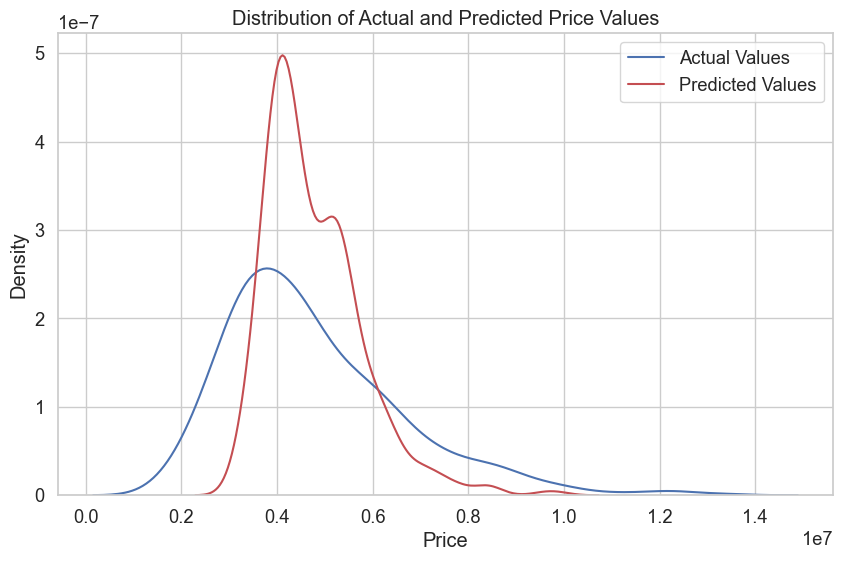

In [108]:
plt.figure(figsize=(10, 6))
# Plotting the distribution of actual price values (in blue)
ax1 = sns.distplot(df['price'], hist=False, color='b', label='Actual Values')

# Plotting the distribution of predicted price values (in red)
sns.distplot(Yhat, hist=False, color='r', label='Predicted Values', ax=ax1)

# Adding labels and title
ax1.set_xlabel('Price')
ax1.set_ylabel('Density')
ax1.set_title('Distribution of Actual and Predicted Price Values')

# Displaying the legend
ax1.legend()

# Showing the plot
plt.show()

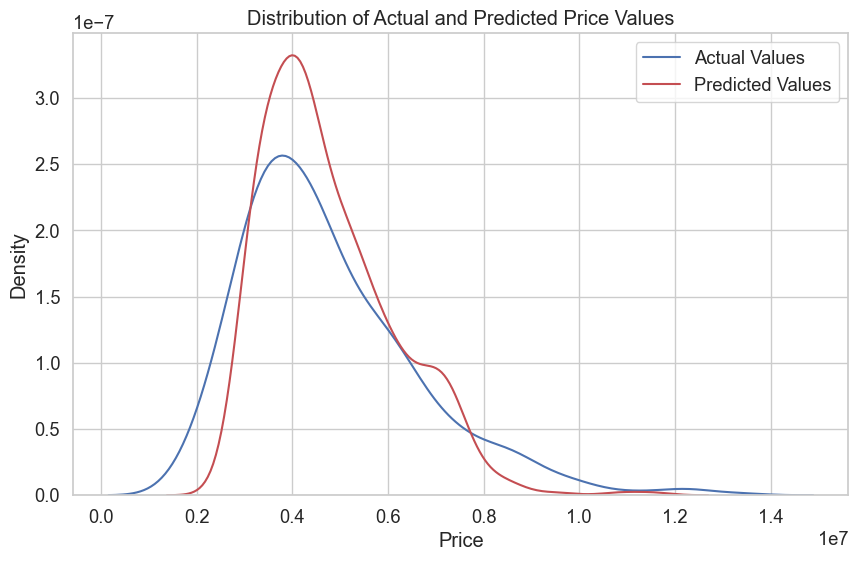

In [109]:
plt.figure(figsize=(10, 6))
# Plotting the distribution of actual price values (in blue)
ax1 = sns.distplot(df['price'], hist=False, color='b', label='Actual Values')

# Plotting the distribution of predicted price values (in red)
sns.distplot(Yhat_multi, hist=False, color='r', label='Predicted Values', ax=ax1)

# Adding labels and title
ax1.set_xlabel('Price')
ax1.set_ylabel('Density')
ax1.set_title('Distribution of Actual and Predicted Price Values')

# Displaying the legend
ax1.legend()

# Showing the plot
plt.show()

### Applying the Standard Scalar with Multiple Linear Regression on our dataset

In [181]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
# Define X and Y
# Scale features
scaler = StandardScaler()
scaler.fit(df[['area', 'bedrooms', 'bathrooms', 'stories']])
X_scaled = scaler.transform(df[['area', 'bedrooms', 'bathrooms', 'stories']])

# Fit linear model
model = LinearRegression()
model.fit(X_scaled, df['price'])

# Make predictions
y_pred = model.predict(X_scaled)

# Evaluate model
r2 = model.score(X_scaled, y)
print(f'R-squared: {r2}')


R-squared: 0.5355960442835979


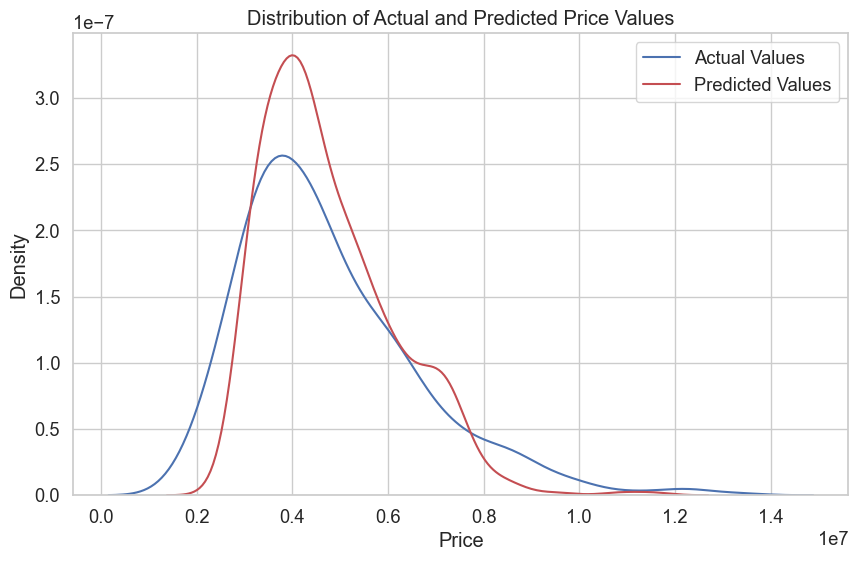

In [111]:
plt.figure(figsize=(10, 6))
# Plotting the distribution of actual price values (in blue)
ax1 = sns.distplot(df['price'], hist=False, color='b', label='Actual Values')

# Plotting the distribution of predicted price values (in red)
sns.distplot(y_pred, hist=False, color='r', label='Predicted Values', ax=ax1)

# Adding labels and title
ax1.set_xlabel('Price')
ax1.set_ylabel('Density')
ax1.set_title('Distribution of Actual and Predicted Price Values')

# Displaying the legend
ax1.legend()

# Showing the plot
plt.show()

## Polynomial Regression

In [112]:
x = df['area']
y = df['price']

In [113]:
f = np.polyfit(x,y,3)

In [114]:
p = np.poly1d(f)

In [115]:
print(p)

           3             2
2.629e+04 x - 3.008e+05 x + 1.249e+06 x + 5.032e+06


## Applying polynomial regression with the help of pipelines using Standard Scalar

In [191]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
# Scale Features
scaler = StandardScaler()

# Create polynomial features
poly = PolynomialFeatures(degree=3)

# Create linear model
linear = LinearRegression()

# Create pipeline
pipeline = Pipeline([('scaler', scaler), ('poly', poly), ('linear', linear)])

# Fit pipeline
pipeline.fit(X_reshaped, Y)

# Make predictions
y_pred1 = pipeline.predict(X_reshaped)

# Evaluate model
r2 = pipeline.score(X_reshaped, Y)
print(f'R-squared: {r2}')


R-squared: 0.32504534381488304


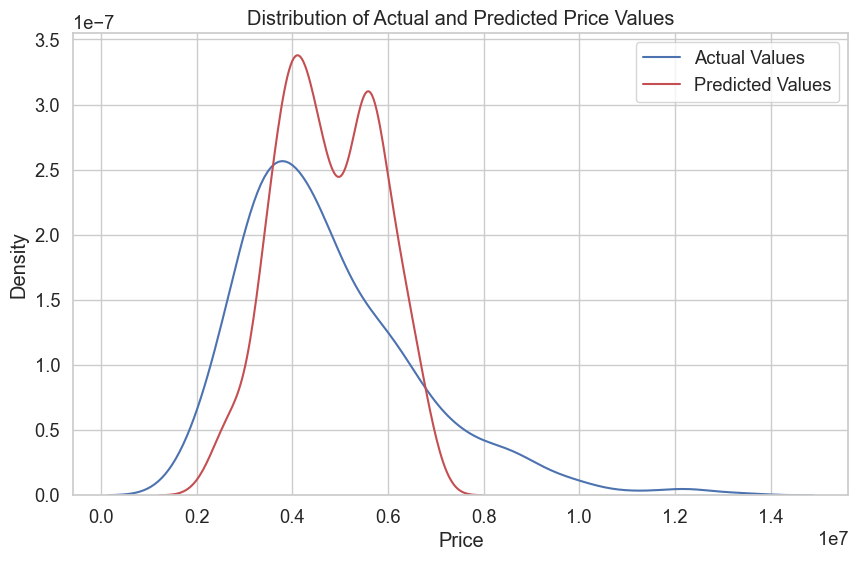

In [184]:
plt.figure(figsize=(10, 6))
# Plotting the distribution of actual price values (in blue)
ax1 = sns.distplot(df['price'], hist=False, color='b', label='Actual Values')

# Plotting the distribution of predicted price values (in red)
sns.distplot(y_pred1, hist=False, color='r', label='Predicted Values', ax=ax1)

# Adding labels and title
ax1.set_xlabel('Price')
ax1.set_ylabel('Density')
ax1.set_title('Distribution of Actual and Predicted Price Values')

# Displaying the legend
ax1.legend()

# Showing the plot
plt.show()

### Applying polynomial regression with the help of pipelines using Standard Scalar (Multiple Inputs)

In [190]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
# Scale Features
scaler = StandardScaler()

# Create polynomial features
poly = PolynomialFeatures(degree=3)

# Create linear model
linear = LinearRegression()

# Create pipeline
pipeline = Pipeline([('scaler', scaler), ('poly', poly), ('linear', linear)])

# Fit pipeline
pipeline.fit(Z, Y)

# Make predictions
y_pred1_multi = pipeline.predict(Z)

# Evaluate model
r2 = pipeline.score(Z, Y)
print(f'R-squared: {r2}')


R-squared: 0.6046253589605944


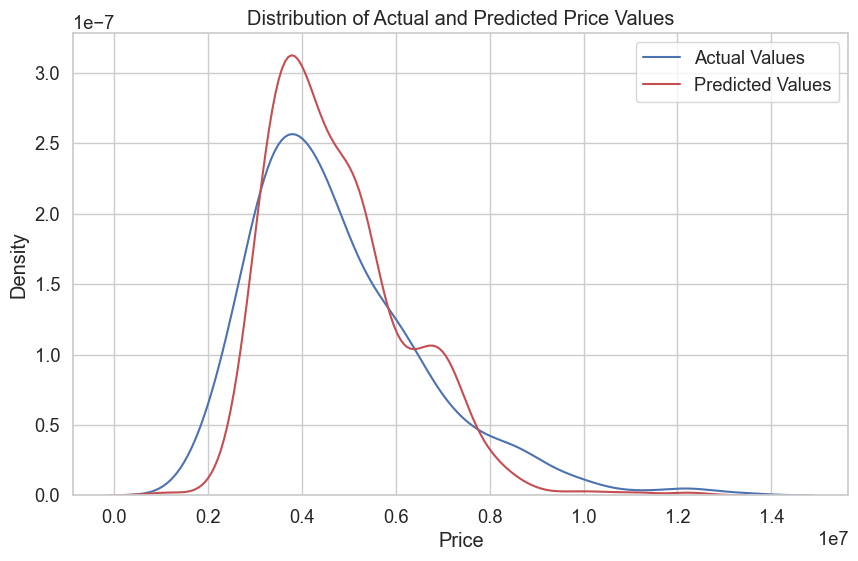

In [187]:
plt.figure(figsize=(10, 6))
# Plotting the distribution of actual price values (in blue)
ax1 = sns.distplot(df['price'], hist=False, color='b', label='Actual Values')

# Plotting the distribution of predicted price values (in red)
sns.distplot(y_pred1_multi, hist=False, color='r', label='Predicted Values', ax=ax1)

# Adding labels and title
ax1.set_xlabel('Price')
ax1.set_ylabel('Density')
ax1.set_title('Distribution of Actual and Predicted Price Values')

# Displaying the legend
ax1.legend()

# Showing the plot
plt.show()

# Model Evaluation and Train Test Split

In [120]:
Z.head()

area  bedrooms  bathrooms   stories
0  1.045766  1.402131   1.420507  1.376952
1  1.755397  1.402131   5.400847  2.529700
2  2.216196  0.047235   1.420507  0.224204
3  1.082630  1.402131   1.420507  0.224204
4  1.045766  1.402131  -0.569663  0.224204

In [121]:
Y.head()

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64

In [188]:
# Import libraries
from sklearn.model_selection import train_test_split
# Load dataset

# Split dataset into train and test sets
Z_train, Z_test, Y_train, Y_test = train_test_split(Z, Y, test_size=0.2, random_state=42)

# Create scaler
scaler = StandardScaler()

# Create polynomial features
poly = PolynomialFeatures(degree=3)

# Create linear model
linear = LinearRegression()

# Create pipeline
pipeline = Pipeline([('scale', scaler), ('poly', poly), ('linear', linear)])

# Fit pipeline on train set
pipeline.fit(Z_train, Y_train)

# Make predictions on test set
Y_pred_test = pipeline.predict(Z_test)

# Evaluate model on test set
mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred_test)
rmse = np.sqrt(mse)
mae = sklearn.metrics.mean_absolute_error(Y_test, Y_pred_test)
r2 = sklearn.metrics.r2_score(Y_test, Y_pred_test)
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R-squared: {r2}')


MSE: 53684445819882.055
RMSE: 7326967.027350543
MAE: 2481710.8559529698
R-squared: -9.620971359245669


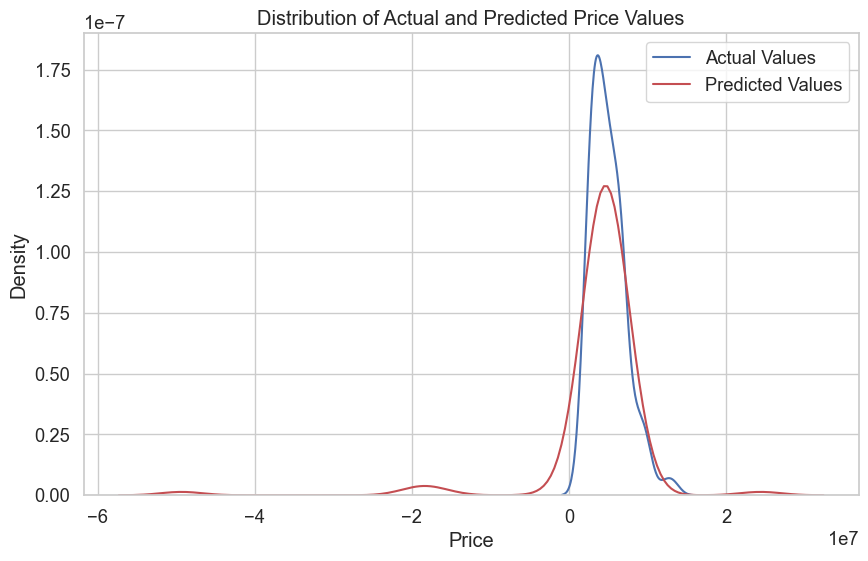

In [189]:
plt.figure(figsize=(10, 6))
# Plotting the distribution of actual price values (in blue)
ax1 = sns.distplot(Y_test, hist=False, color='b', label='Actual Values')

# Plotting the distribution of predicted price values (in red)
sns.distplot(Y_pred_test, hist=False, color='r', label='Predicted Values', ax=ax1)

# Adding labels and title
ax1.set_xlabel('Price')
ax1.set_ylabel('Density')
ax1.set_title('Distribution of Actual and Predicted Price Values')

# Displaying the legend
ax1.legend()

# Showing the plot
plt.show()

In [192]:
# Import libraries

# Load dataset

# Split dataset into train and test sets
Z_train, Z_test, Y_train, Y_test = train_test_split(Z, Y, test_size=0.2, random_state=42)

# Create scaler
scaler = StandardScaler()

# Create polynomial features
poly = PolynomialFeatures(degree=3)

# Create linear model
# linear = sklearn.linear_model.LinearRegression()
linear = LinearRegression(fit_intercept=True)

# Create pipeline
pipeline = Pipeline([('scale', scaler), ('poly', poly), ('linear', linear)])

# Fit pipeline on train set
pipeline.fit(Z_train, Y_train)

# Make predictions on test set
Y_pred_test = pipeline.predict(Z_test)

# Evaluate model on test set
mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred_test)
rmse = np.sqrt(mse)
mae = sklearn.metrics.mean_absolute_error(Y_test, Y_pred_test)
r2 = sklearn.metrics.r2_score(Y_test, Y_pred_test)
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R-squared: {r2}')


MSE: 53684445819882.055
RMSE: 7326967.027350543
MAE: 2481710.8559529698
R-squared: -9.620971359245669


## K-Fold cross validation

In [193]:
# Import libraries
from sklearn.model_selection import cross_val_score,cross_val_predict

# Load dataset
Z = df[['area', 'bedrooms', 'bathrooms', 'stories']]
Y = df['price']
# Define model
#model = sklearn.linear_model.LinearRegression() # linear regression model

# Perform K cross validation
scores = cross_val_score(lm_multi, Z, Y, cv=5, scoring='r2') # 5-fold cross validation with R-squared metric

# Calculate average score
avg_score = np.mean(scores)

# Make predictions on test set
Y_pred_cross = cross_val_predict(lm_multi,Z,Y,cv=5)

# Print results
print(f'Scores for each fold: {scores}')
print(f'Average score: {avg_score}')


Scores for each fold: [ -2.76092036  -6.64439763 -15.64697347 -22.82794156 -12.70918673]
Average score: -12.117883950232361


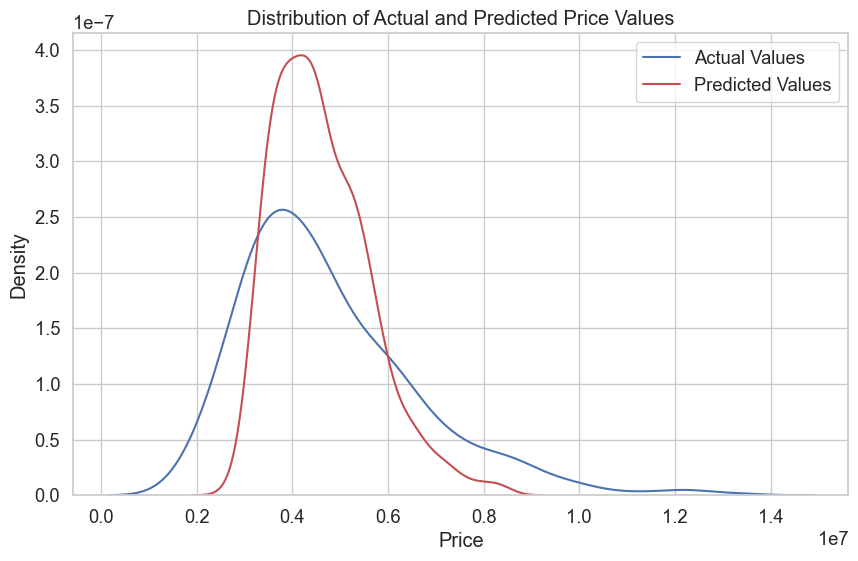

In [194]:
plt.figure(figsize=(10, 6))
# Plotting the distribution of actual price values (in blue)
ax1 = sns.distplot(Y, hist=False, color='b', label='Actual Values')

# Plotting the distribution of predicted price values (in red)
sns.distplot(Y_pred_cross, hist=False, color='r', label='Predicted Values', ax=ax1)

# Adding labels and title
ax1.set_xlabel('Price')
ax1.set_ylabel('Density')
ax1.set_title('Distribution of Actual and Predicted Price Values')

# Displaying the legend
ax1.legend()

# Showing the plot
plt.show()

In [195]:
# Import libraries

from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.pipeline import Pipeline

# Load dataset
Z = df[['area', 'bedrooms', 'bathrooms', 'stories']]
Y = df['price']
# Define model

# Create scaler
scaler = StandardScaler()

# Create polynomial features
poly = PolynomialFeatures(degree=3)

# Create linear model
linear = LinearRegression(fit_intercept=True)

# Create pipeline
pipeline = Pipeline([('scale', scaler), ('poly', poly), ('linear', linear)])

# Perform K cross validation
scores = cross_val_score(pipeline, Z, Y, cv=5, scoring='r2') # 5-fold cross validation with R-squared metric

# Calculate average score
avg_score = np.mean(scores)

# Make predictions on test set
Y_pred_cross_poly = cross_val_predict(pipeline,Z,Y,cv=5)

# Print results
print(f'Scores for each fold: {scores}')
print(f'Average score: {avg_score}')


Scores for each fold: [  -2.87623604 -151.22763004  -25.78739699  -24.78034998  -11.24354416]
Average score: -43.183031440876974


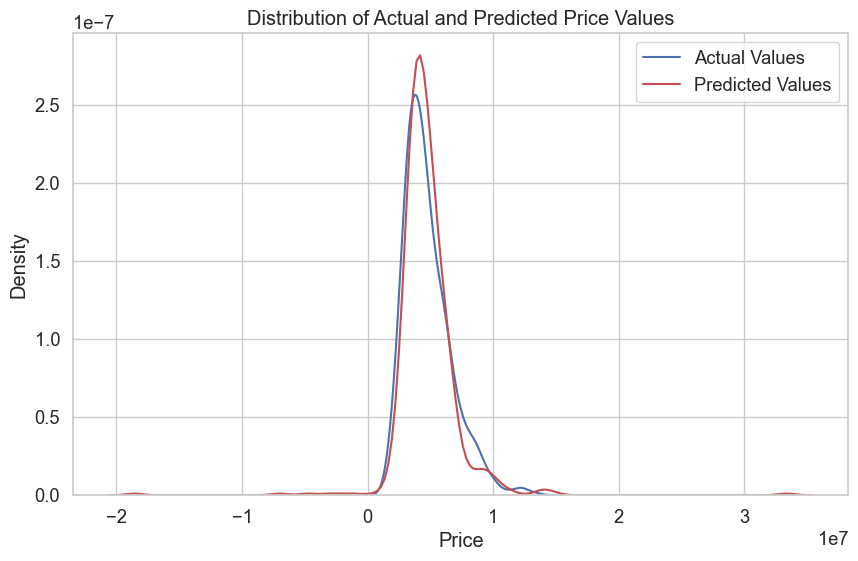

In [196]:
plt.figure(figsize=(10, 6))
# Plotting the distribution of actual price values (in blue)
ax1 = sns.distplot(Y, hist=False, color='b', label='Actual Values')

# Plotting the distribution of predicted price values (in red)
sns.distplot(Y_pred_cross_poly, hist=False, color='r', label='Predicted Values', ax=ax1)

# Adding labels and title
ax1.set_xlabel('Price')
ax1.set_ylabel('Density')
ax1.set_title('Distribution of Actual and Predicted Price Values')

# Displaying the legend
ax1.legend()

# Showing the plot
plt.show()

## Overfitting, Underfitting and Model Seleciton

Degrees: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Training scores: [0.5062341763010348, 0.5442721364111031, -0.5749166216215551, -2.0030598881840405, 0.6767567698509082, 0.6907933175307228, 0.6836158901466927, 0.6933542965190086, 0.714443955617454, 0.725875549120523]
Test scores: [-12.117883950232391, -12.311830162026924, -43.183031440876974, -3.6362791768237267e+24, -4.49214582040521e+22, -1.7204819375101043e+21, -3.3858243761444677e+24, -2.026434451058197e+24, -1.0348925210383218e+16, -1.263789637738364e+19]


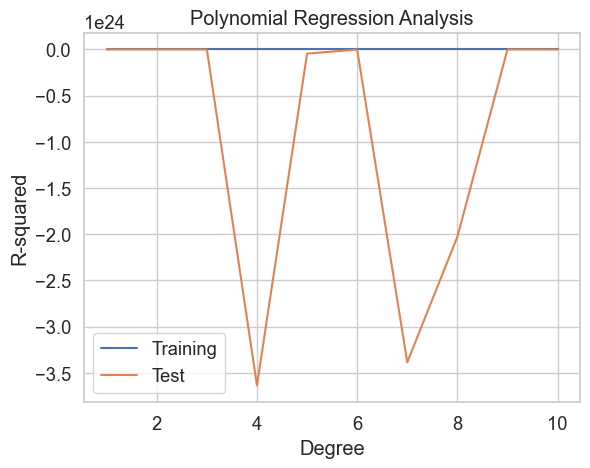

In [154]:
# Import libraries
import numpy as np
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.linear_model
import sklearn.model_selection
import matplotlib.pyplot as plt

# Load dataset
Z = df[['area', 'bedrooms', 'bathrooms', 'stories']]
Y = df['price']

# Define constants
K = 5  # number of folds for cross validation
DEGREES = list(range(1, 11))  # degrees of polynomial features

# Initialize lists to store scores
train_scores = []
test_scores = []

# Loop over the degrees
for degree in DEGREES:
    # Create pipeline object that combines scaling, polynomial features, and linear regression
    pipeline = sklearn.pipeline.Pipeline([
        ('scale', sklearn.preprocessing.StandardScaler()),
        ('poly', sklearn.preprocessing.PolynomialFeatures(degree=degree)),
        ('linear', sklearn.linear_model.LinearRegression(fit_intercept=True))
    ])

    # Perform cross validation on the pipeline and the data
    cv_results = sklearn.model_selection.cross_validate(pipeline, Z, Y, cv=K, scoring='r2',
                                                        return_train_score=True)

    # Append the mean scores for the training and test sets to the lists
    train_scores.append(np.mean(cv_results['train_score']))
    test_scores.append(np.mean(cv_results['test_score']))

# Print the degrees and the scores
print('Degrees:', DEGREES)
print('Training scores:', train_scores)
print('Test scores:', test_scores)

# Plot the scores as a function of the degrees
plt.plot(DEGREES, train_scores, label='Training')
plt.plot(DEGREES, test_scores, label='Test')
plt.xlabel('Degree')
plt.ylabel('R-squared')
plt.title('Polynomial Regression Analysis')
plt.legend()
plt.show()


In [148]:
# Import libraries

from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.pipeline import Pipeline

# Load dataset
Z = df[['area', 'bedrooms', 'bathrooms', 'stories']]
Y = df['price']
# Define model

# Create scaler
scaler = sklearn.preprocessing.StandardScaler()

# Create polynomial features
poly = sklearn.preprocessing.PolynomialFeatures(degree=3)

# Create linear model
linear = sklearn.linear_model.LinearRegression(fit_intercept=True)

# Create pipeline
pipeline = sklearn.pipeline.Pipeline([('scale', scaler), ('poly', poly), ('linear', linear)])

# Perform K cross validation
scores = cross_val_score(pipeline, Z, Y, cv=5, scoring='r2') # 5-fold cross validation with R-squared metric

# Calculate average score
avg_score = np.mean(scores)

# Make predictions on test set
Y_pred_cross_poly1 = cross_val_predict(pipeline,Z,Y,cv=5)

# Print results
print(f'Scores for each fold: {scores}')
print(f'Average score: {avg_score}')


Scores for each fold: [  -2.87623604 -151.22763004  -25.78739699  -24.78034998  -11.24354416]
Average score: -43.183031440876974


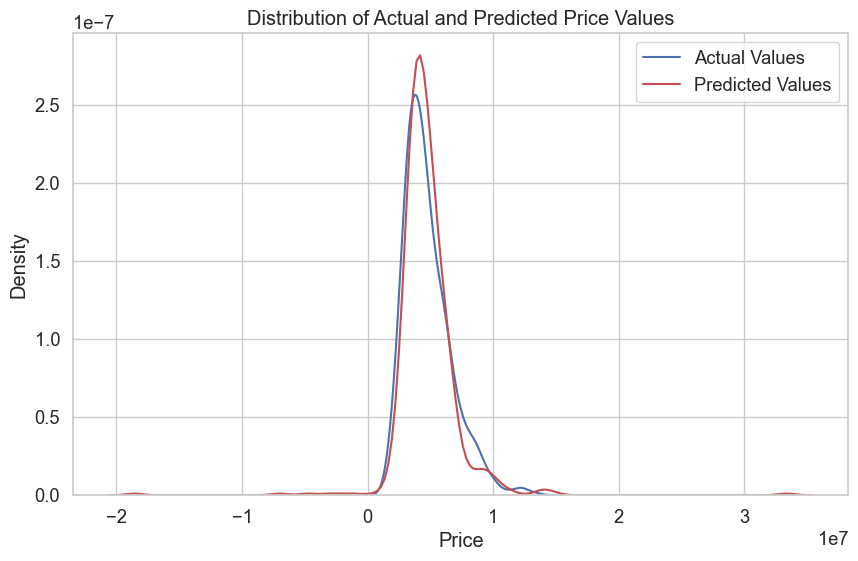

In [149]:
plt.figure(figsize=(10, 6))
# Plotting the distribution of actual price values (in blue)
ax1 = sns.distplot(Y, hist=False, color='b', label='Actual Values')

# Plotting the distribution of predicted price values (in red)
sns.distplot(Y_pred_cross_poly1, hist=False, color='r', label='Predicted Values', ax=ax1)

# Adding labels and title
ax1.set_xlabel('Price')
ax1.set_ylabel('Density')
ax1.set_title('Distribution of Actual and Predicted Price Values')

# Displaying the legend
ax1.legend()

# Showing the plot
plt.show()

### Model Selection without pipeline

Degrees: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Training scores: [0.54, 0.58, 0.63, 0.66, 0.69, 0.7, 0.71, 0.72, 0.73, 0.75]
Test scores: [0.51, 0.5, -9.62, -0.7, -2.66, -52.77, -1.609105523316713e+20, -3.16155783554975e+22, -1128346.33, -1397386.97]


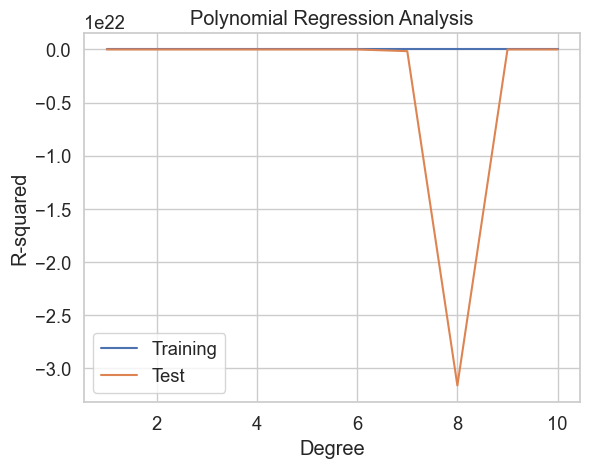

In [153]:
# Import libraries
from sklearn.preprocessing import PolynomialFeatures
#from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# Load dataset
Z = df[['area', 'bedrooms', 'bathrooms', 'stories']]
Y = df['price']
# Define model

# Define constants
#K = 5 # number of folds for cross validation
DEGREES = list(range(1,11,1)) # degrees of polynomial features

# Initialize lists to store scores
train_scores = []
test_scores = []
x_train,x_test,y_train,y_test = train_test_split(Z,Y,test_size=0.2,random_state=42)
# Loop over the degrees
for degree in DEGREES:
    # Create pipeline object that combines scaling, polynomial features, and linear regression
    pr = PolynomialFeatures(degree = degree)
    lr = LinearRegression()
    x_train_pr = pr.fit_transform(x_train)
    x_test_pr = pr.fit_transform(x_test)
    lr.fit(x_train_pr, y_train)

    # Append the mean scores for the training and test sets to the lists
    train_scores.append(round(lr.score(x_train_pr,y_train),2))
    test_scores.append(round(lr.score(x_test_pr,y_test),2))

# Print the degrees and the scores
print('Degrees:', DEGREES)
print('Training scores:', train_scores)
print('Test scores:', test_scores)

# Plot the scores as a function of the degrees
plt.plot(DEGREES, train_scores, label='Training')
plt.plot(DEGREES, test_scores, label='Test')
plt.xlabel('Degree')
plt.ylabel('R-squared')
plt.title('Polynomial Regression Analysis')
plt.legend()
plt.show()


# Ridge Regression

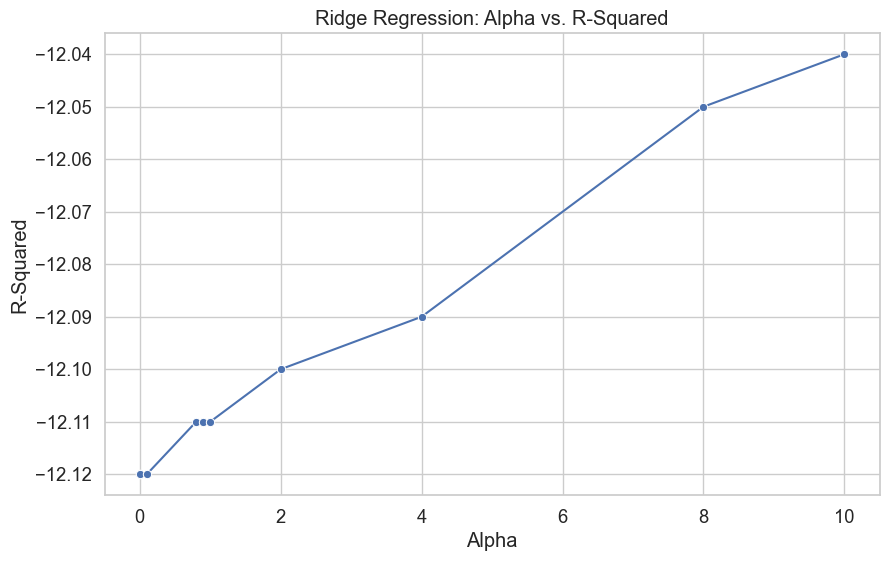

In [166]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import numpy as np

Z = df[['area', 'bedrooms', 'bathrooms', 'stories']]
Y = df['price']

alpha_values = [0.001, 0.01, 0.1, 0.8, 0.9, 1, 2, 4, 8, 10]
compare_alpha_and_Rsquare = {'alpha': [], 'RSquared': []}

for alpha in alpha_values:
    RidgeModel = Ridge(alpha=alpha)
    scores = cross_val_score(RidgeModel, Z, Y, cv=5, scoring='r2')
    mean_r_squared = np.mean(scores)
    compare_alpha_and_Rsquare['alpha'].append(alpha)
    compare_alpha_and_Rsquare['RSquared'].append(round(mean_r_squared, 2))

compare_alpha_and_Rsquare_df = pd.DataFrame(compare_alpha_and_Rsquare)

# Plotting using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='alpha', y='RSquared', data=compare_alpha_and_Rsquare_df, marker='o')
plt.title('Ridge Regression: Alpha vs. R-Squared')
plt.xlabel('Alpha')
plt.ylabel('R-Squared')
#plt.xticks(alpha_values)  # Ensure all alpha values are displayed on the x-axis
plt.grid(True)
plt.show()


In [180]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

Z = df[['area', 'bedrooms', 'bathrooms', 'stories']]
Y = df['price']

# Define the range of alpha values to be tested
parameters = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.8, 0.9, 1, 1.1, 1.5, 2, 3, 4, 5, 10, 20, 50, 100, 200]}

# Create Ridge regression model
ridge_model = Ridge()

# Perform Grid Search CV to find the best estimator
grid_search = GridSearchCV(estimator=ridge_model, param_grid=parameters, cv=5)
grid_search.fit(Z, Y)

# Get the best estimator
best_estimator = grid_search.best_estimator_

# Get the CV results
cv_results = grid_search.cv_results_

# Print the best estimator
print("Best Estimator:", best_estimator)

# Print the R^2 scores on test data for each combination of parameters
print("R^2 Scores on Test Data:")
for params, mean_val in zip(cv_results['params'], cv_results['mean_test_score']):
    print(params, "R^2 on test data:", round(mean_val, 2))


Best Estimator: Ridge(alpha=200)
R^2 Scores on Test Data:
{'alpha': 0.0001} R^2 on test data: -12.12
{'alpha': 0.001} R^2 on test data: -12.12
{'alpha': 0.01} R^2 on test data: -12.12
{'alpha': 0.1} R^2 on test data: -12.12
{'alpha': 0.8} R^2 on test data: -12.11
{'alpha': 0.9} R^2 on test data: -12.11
{'alpha': 1} R^2 on test data: -12.11
{'alpha': 1.1} R^2 on test data: -12.11
{'alpha': 1.5} R^2 on test data: -12.11
{'alpha': 2} R^2 on test data: -12.1
{'alpha': 3} R^2 on test data: -12.09
{'alpha': 4} R^2 on test data: -12.09
{'alpha': 5} R^2 on test data: -12.08
{'alpha': 10} R^2 on test data: -12.04
{'alpha': 20} R^2 on test data: -11.97
{'alpha': 50} R^2 on test data: -11.8
{'alpha': 100} R^2 on test data: -11.65
{'alpha': 200} R^2 on test data: -11.6
